# NAB Dataset Labeling Annotation

This notebook provides a labeling process for signas of NAB Dataset

Labels are derived from information provided on the Numenta GitHub: https://github.com/numenta/NAB/tree/master/labels.

The ground truth anomaly regions are based on data from 'combined_labels.json' and 'combined_windows.json'.


In [4]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Necessary functions

In [25]:
def filter_anomalies(file_path, start_date, end_date, anomaly_label=1):
    """
    Filters and labels anomalies within a specified time range in a DataFrame.

    Args:
        file_path (str): The path to the CSV file containing the data.
        start_date (str): The start date and time of the time range (in 'YYYY-MM-DD HH:mm:ss' format).
        end_date (str): The end date and time of the time range (in 'YYYY-MM-DD HH:mm:ss' format).
        anomaly_label (int, optional): The label to assign to anomaly rows within the time range. Default is 1.

    Returns:
        pd.DataFrame: A DataFrame with the 'is_anomaly' column added, where anomalies within the time range are labeled
                      with the specified `anomaly_label`.
    """
    # Convert the 'timestamp' column to datetime
    df['timestamp'] = pd.to_datetime(df['timestamp'])

    # Set 'is_anomaly' values to the specified label for the time range
    df.loc[(df['timestamp'] >= start_date) & (df['timestamp'] <= end_date), 'is_anomaly'] = anomaly_label

    return df


In [9]:
def plot_anomalies(df, file_name):
    """
    Plots anomalies in a time series DataFrame.

    Args:
        df (pd.DataFrame): The DataFrame containing time series data with an 'is_anomaly' column.
        file_name (str): The name or title for the plot.
    """
    plt.figure(figsize=(16, 10))
    plt.title(f'Anomaly plot {file_name}', size=16)
    plt.plot(df['timestamp'], df['value'])
    plt.scatter(df[df['is_anomaly'] == 1]['timestamp'], df[df['is_anomaly'] == 1]['value'], color='red', label='Anomalies')
    plt.xlabel('timestamp', size=14)
    plt.ylabel('Value', size=14)
    plt.legend()
    plt.show()


In [15]:
def save_to_csv(df, file_name):
    """
    Saves a DataFrame to a CSV file.

    Args:
        df (pd.DataFrame): The DataFrame to be saved.
        file_name (str): The name of the CSV file to which the DataFrame will be saved.
    """
    df.to_csv(f'NAB_new/{file_name}_anomaly.csv', index=False)
    

### ArtificialWithAnomaly collection

In [11]:
file_path = 'NAB/artificialWithAnomaly/'

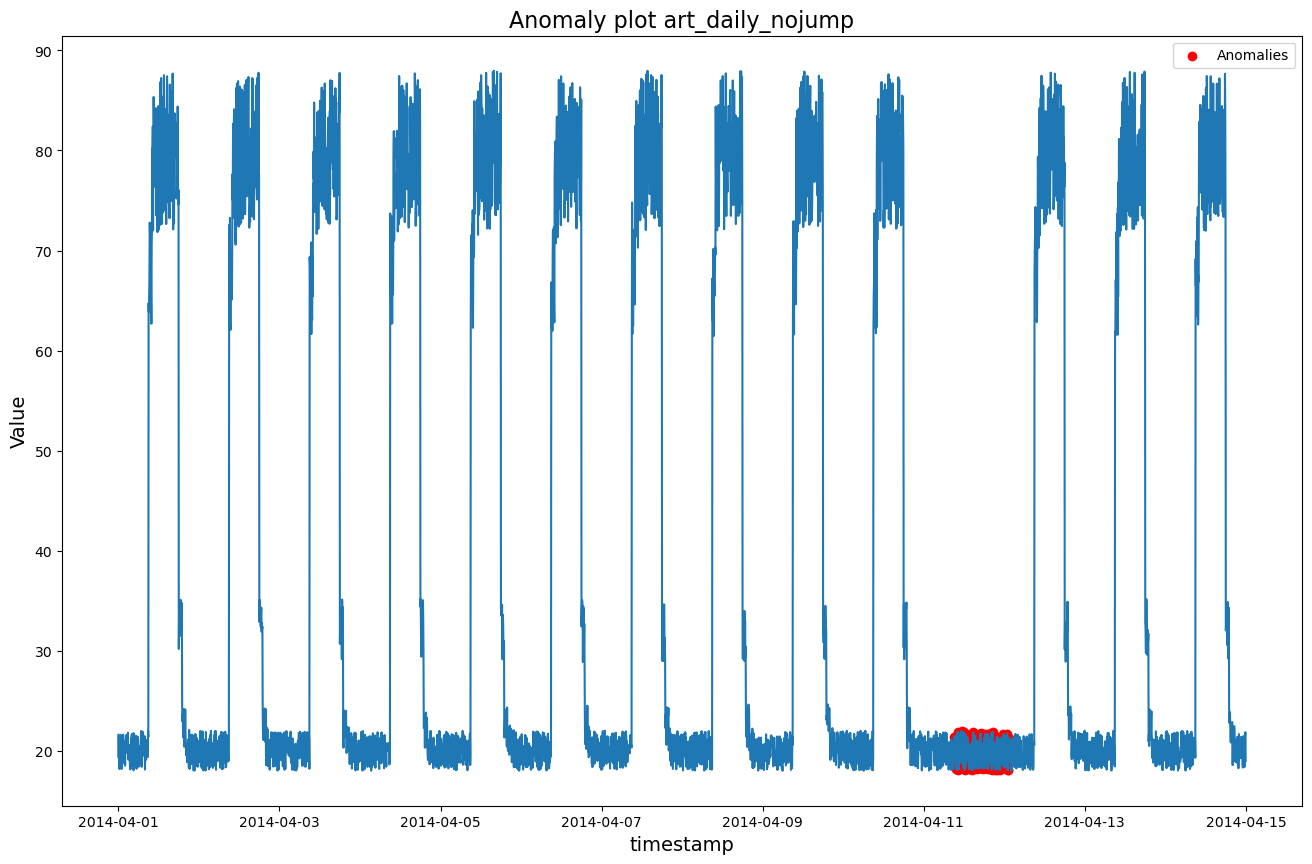

In [26]:
start_date = '2014-04-11 09:00:00'
end_date = '2014-04-12 01:45:00'

#anomaly anotation
file_name = 'art_daily_nojump'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

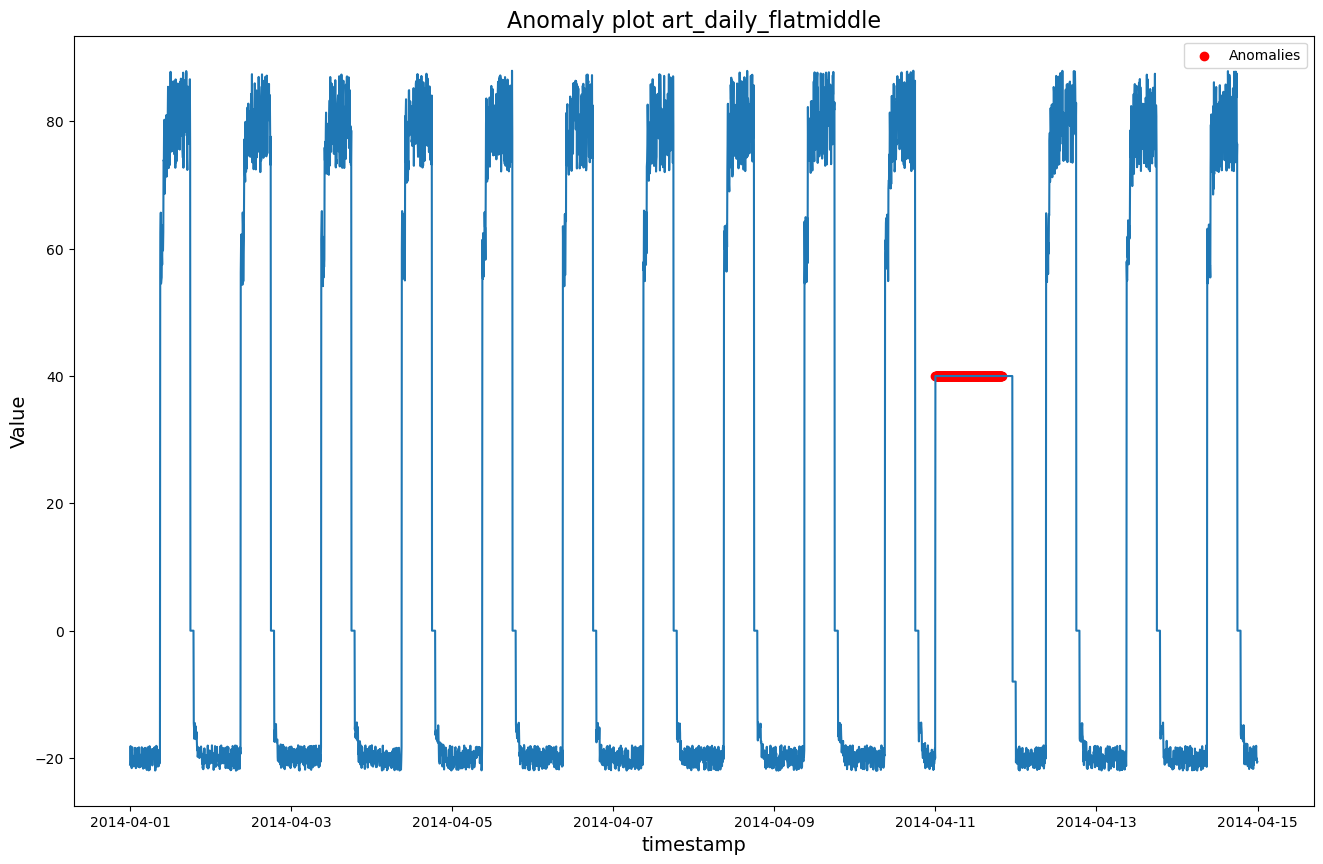

In [27]:

start_date = '2014-04-11 00:00:00'
end_date = '2014-04-11 19:45:00'#empirically,using .json files. Was 2014-04-11 17:45:00

#anomaly anotation
file_name = 'art_daily_flatmiddle'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

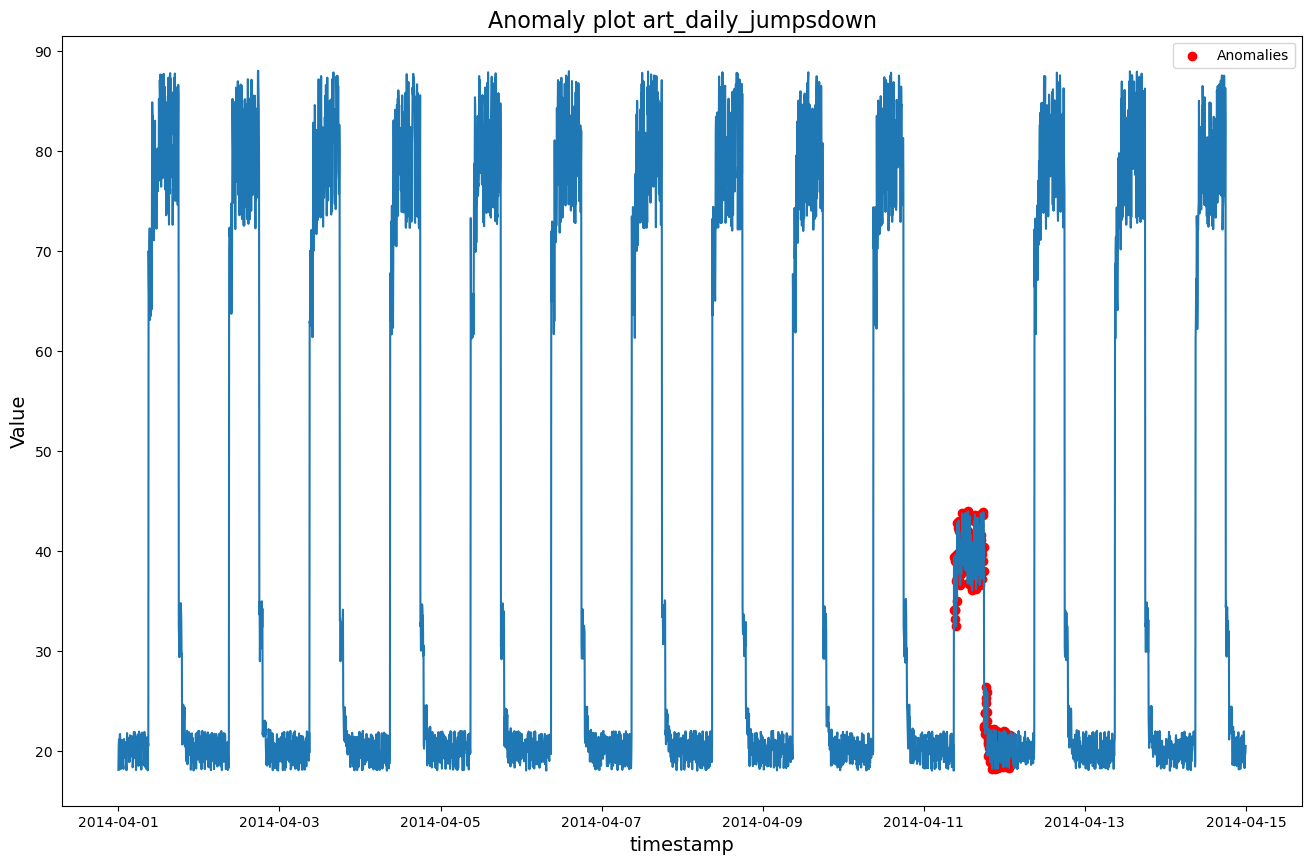

In [28]:

start_date = '2014-04-11 09:00:00'#anomaly starts
end_date = '2014-04-12 01:45:00' #empiricaly, using .json files Before was #"2014-04-10 16:15:00.000000" - "2014-04-12 01:45:00.000000"

#anomaly anotation
file_name = 'art_daily_jumpsdown'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

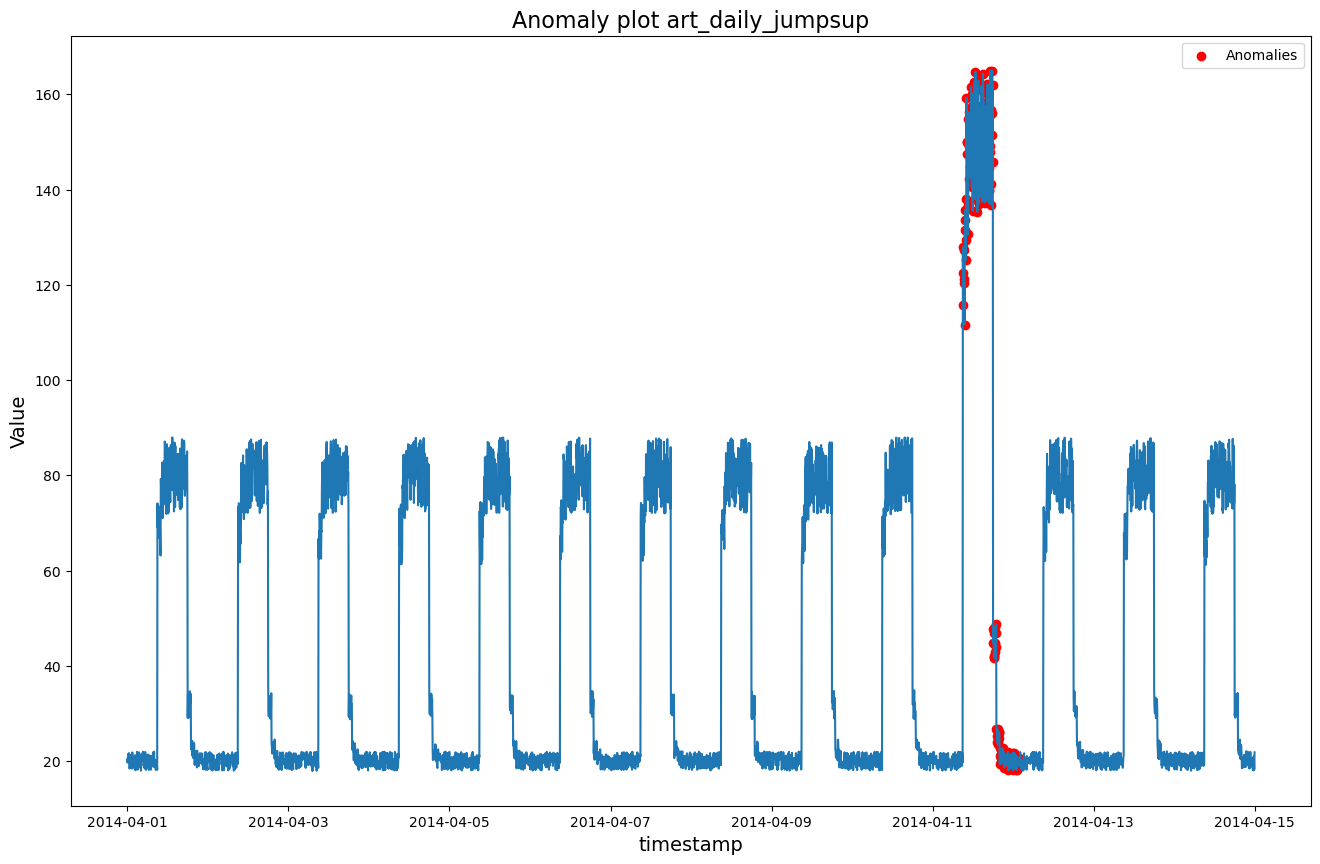

In [29]:

start_date = '2014-04-11 09:00:00'#anomaly starts
end_date = '2014-04-12 01:45:00' #empirically using .json files Before was "2014-04-10 16:15:00.000000","2014-04-12 01:45:00.000000"

#anomaly anotation
file_name = 'art_daily_jumpsup'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

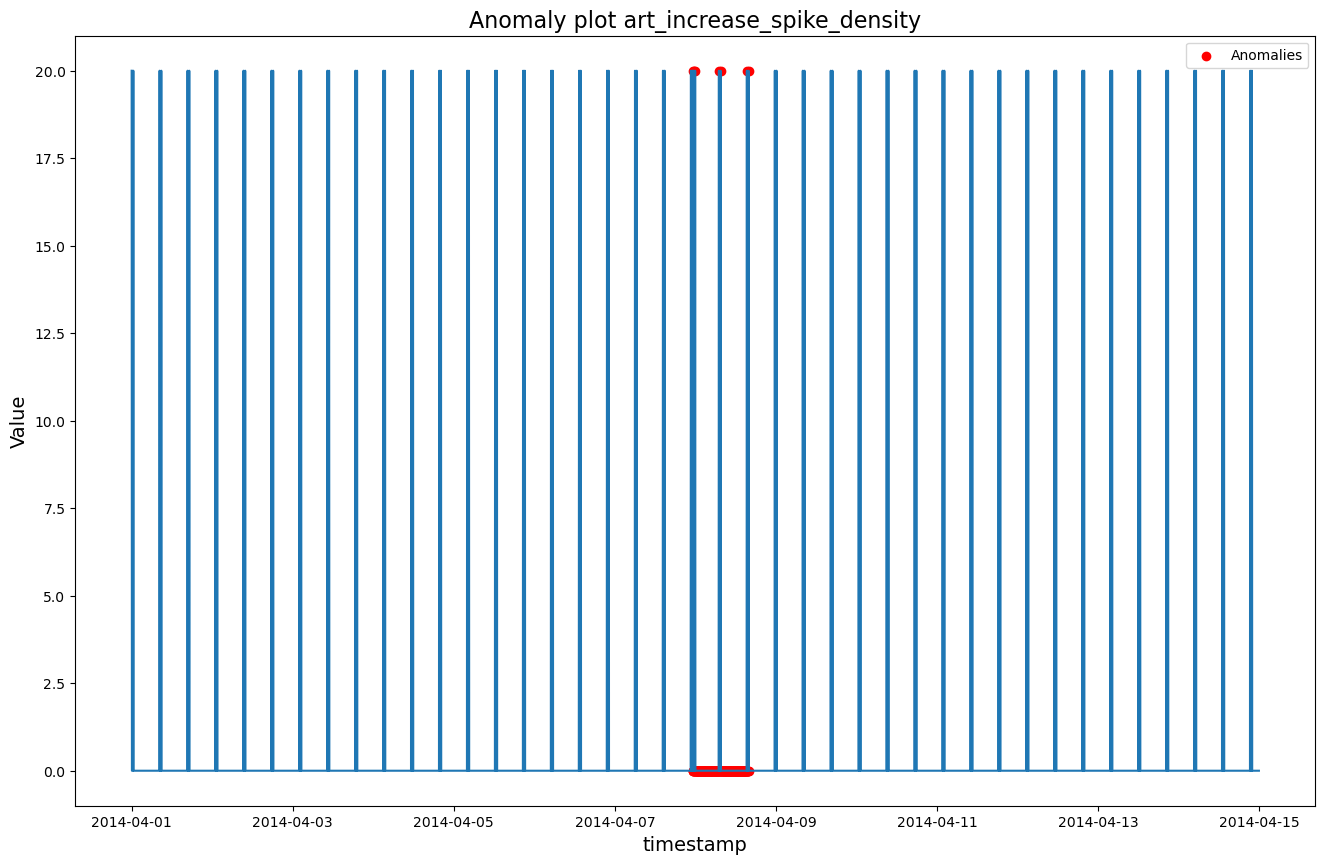

In [30]:

start_date = '2014-04-07 23:10:00'#anomaly starts "2014-04-07 23:10:00.000000"
end_date = '2014-04-08 15:55:00' #window was "2014-04-07 06:25:00.000000" - "2014-04-08 15:55:00.000000"

#anomaly anotation
file_name = 'art_increase_spike_density'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

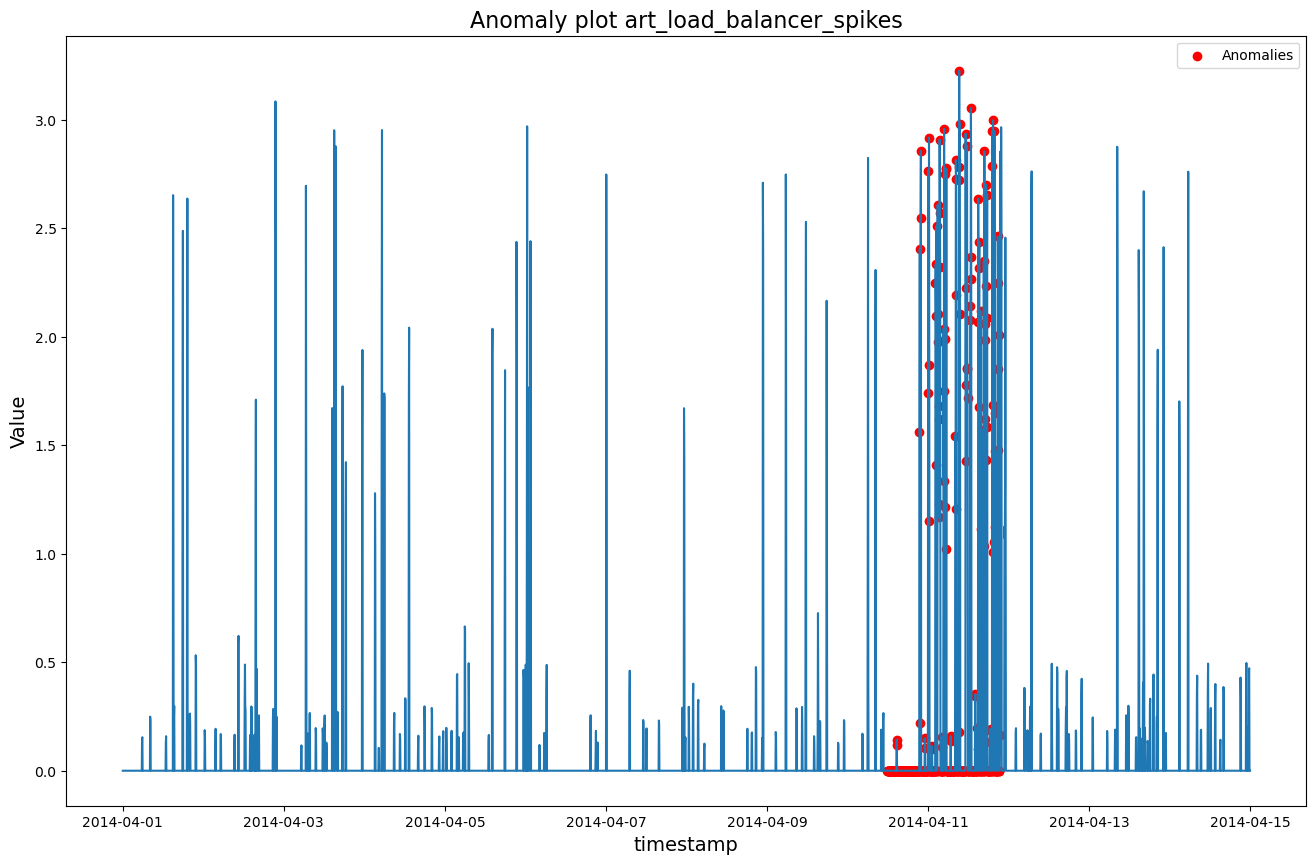

In [31]:
start_date = '2014-04-10 11:50:00'#label anomaly starts  "2014-04-11 04:35:00"
end_date = '2014-04-11 21:20:00' #window was "2014-04-10 11:50:00.000000" - "2014-04-11 21:20:00.000000"

#anomaly anotation
file_name = 'art_load_balancer_spikes'
df = pd.read_csv(f'NAB/artificialWithAnomaly/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

### RealAWSCloudwatch collection

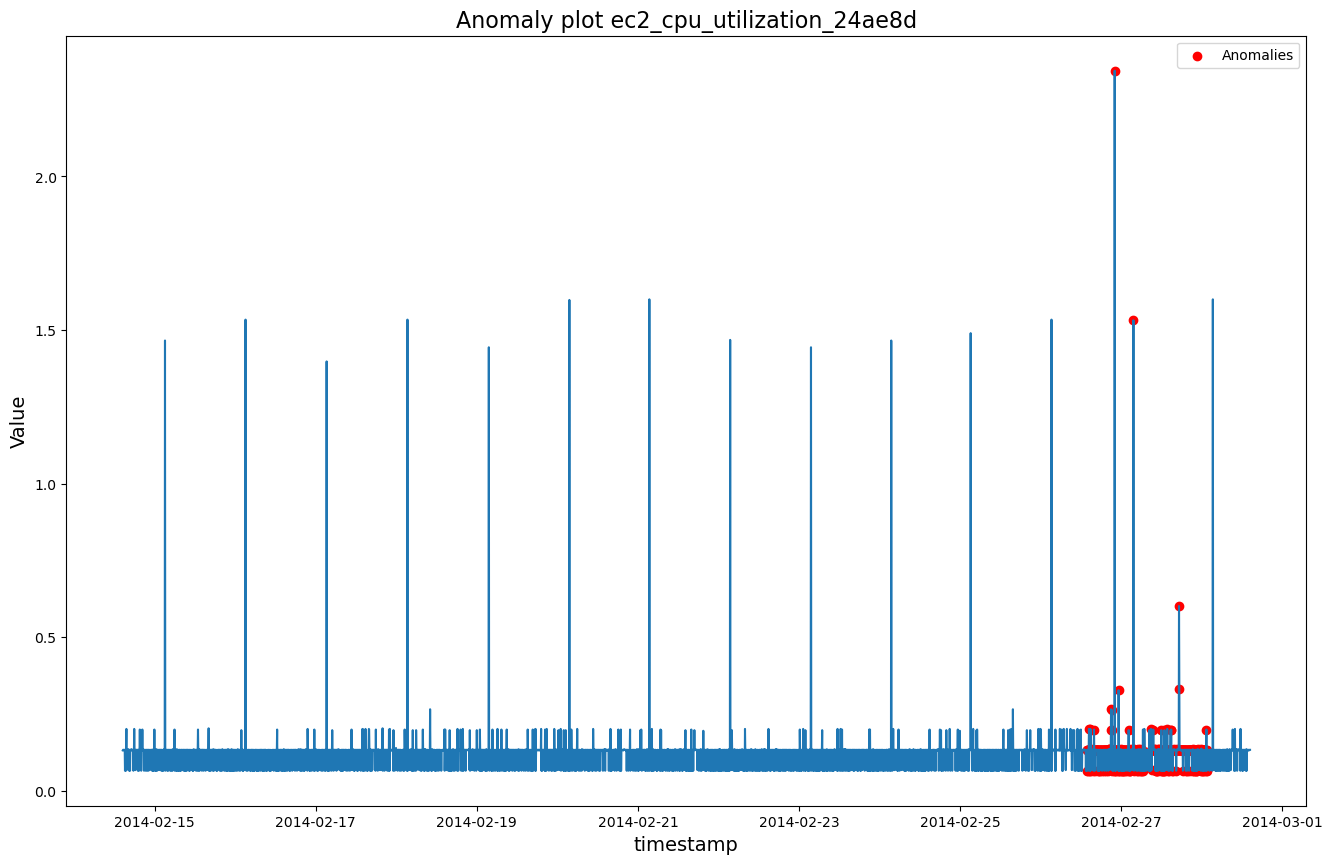

In [40]:
start_date = '2014-02-26 13:45:00'#label anomaly starts  "2014-02-26 22:05:00"
end_date = '2014-02-27 06:25:00' #window was "2014-02-26 13:45:00.000000","2014-02-27 06:25:00.000000"

#anomaly anotation
file_name = 'ec2_cpu_utilization_24ae8d'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-27 08:55:00'#label anomaly starts  "2014-02-27 17:15:00"
end_date = '2014-02-28 01:35:00' #window was "2014-02-27 08:55:00.000000","2014-02-28 01:35:00.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)


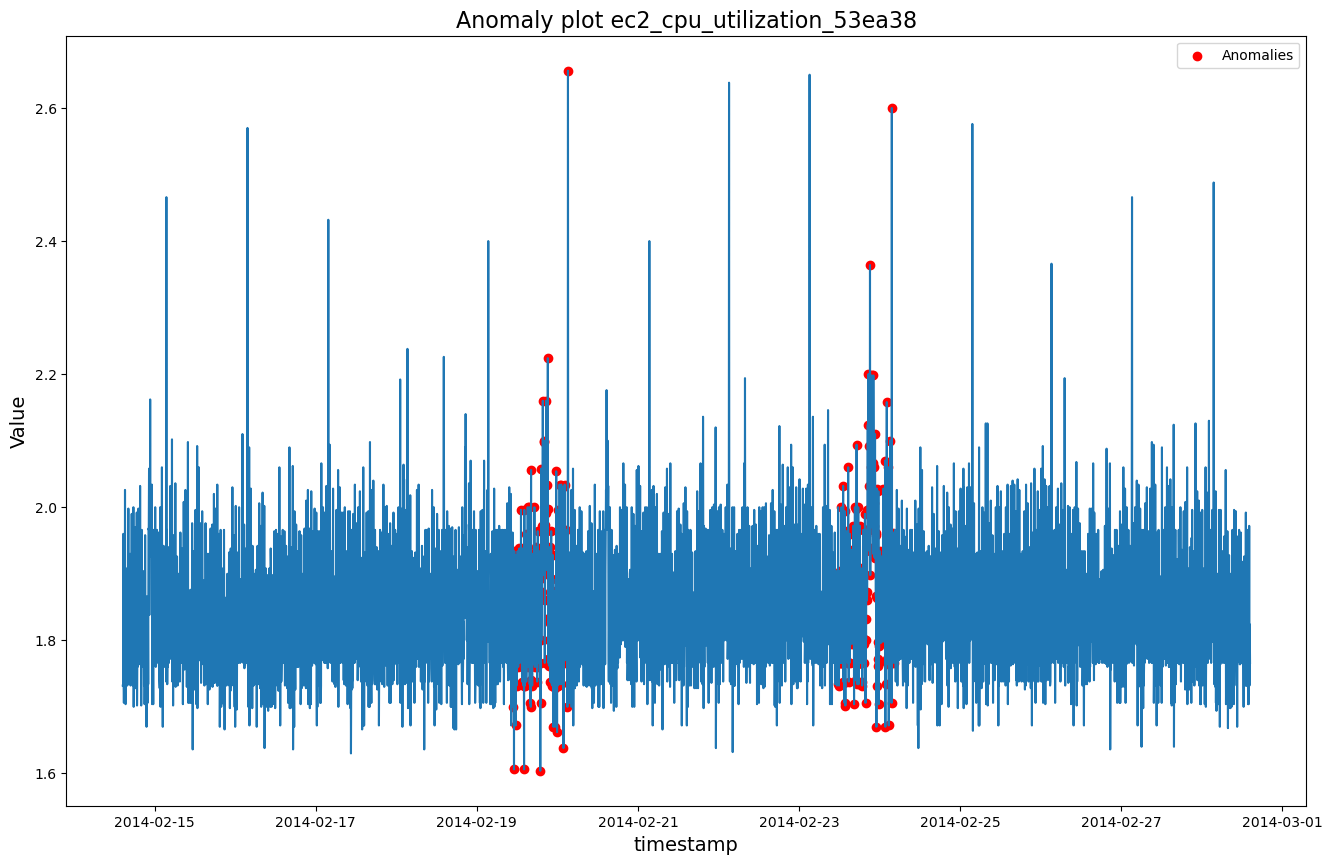

In [41]:
start_date = '2014-02-19 10:50:00'#label anomaly starts  2014-02-19 19:10:00
end_date = '2014-02-20 03:30:00' #window was "2014-02-19 10:50:00.000000" - "2014-02-20 03:30:00.000000"

#anomaly anotation
file_name = 'ec2_cpu_utilization_53ea38'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-23 11:45:00'#label anomaly starts  "2014-02-23 20:05:00"
end_date = '2014-02-24 04:25:00' #window was "2014-02-23 11:45:00.000000" - "2014-02-24 04:25:00.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)


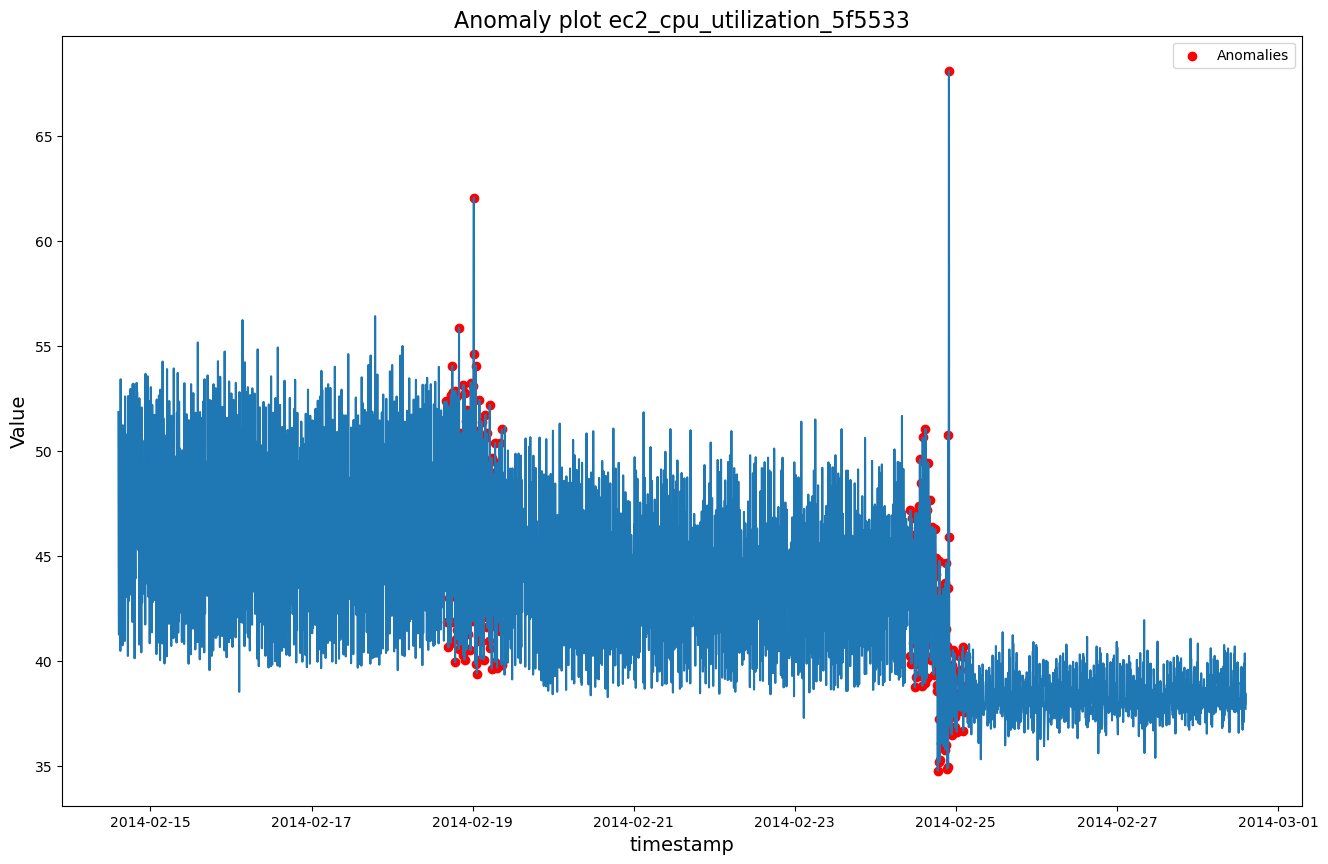

In [42]:

start_date = '2014-02-18 16:02:00'#label anomaly starts  "2014-02-19 00:22:00"
end_date = '2014-02-19 08:42:00' #window was "2014-02-18 16:02:00.000000" - "2014-02-19 08:42:00.000000"

#anomaly anotation
file_name = 'ec2_cpu_utilization_5f5533'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-24 10:17:00'#label anomaly starts  "2014-02-24 18:37:00"
end_date = '2014-02-25 02:57:00' #window was "2014-02-24 10:17:00.000000" - "2014-02-25 02:57:00.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)


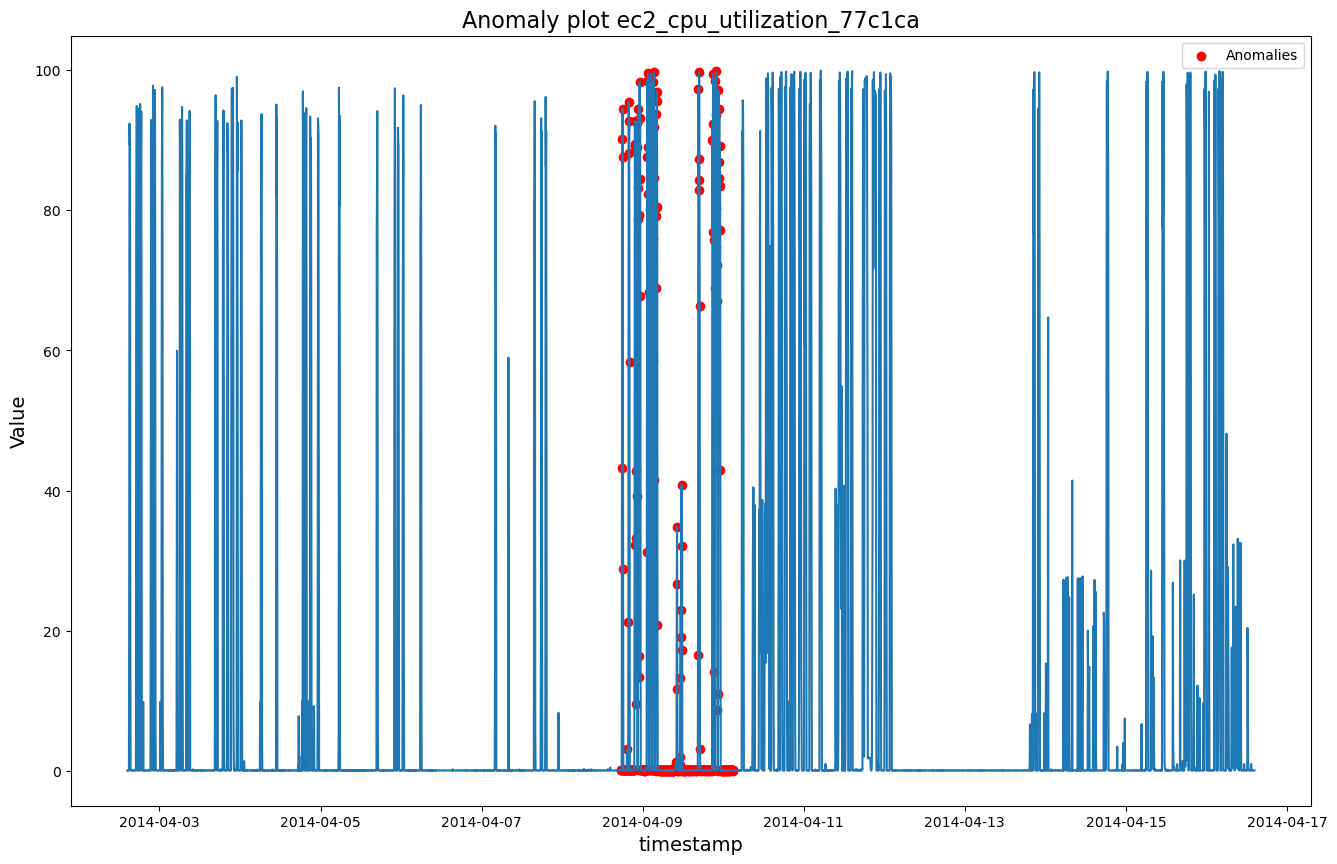

In [43]:

start_date = '2014-04-08 17:30:00'#label anomaly starts  "2014-04-09 10:15:00"
end_date = '2014-04-10 03:00:00' #window was "2014-04-08 17:30:00.000000" - "2014-04-10 03:00:00.000000"


#anomaly anotation
file_name = 'ec2_cpu_utilization_77c1ca'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

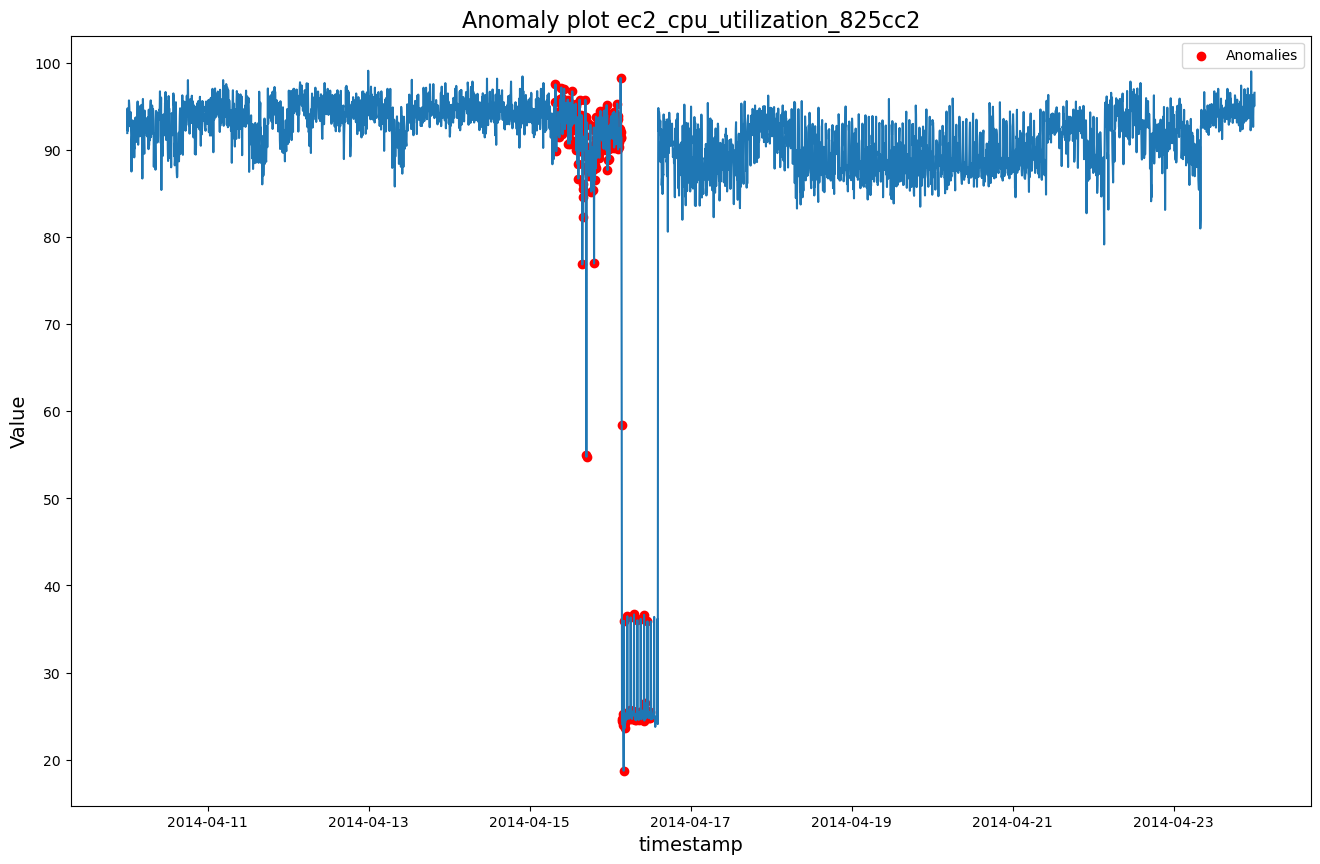

In [44]:

start_date = '2014-04-15 07:24:00'#label anomaly starts  "2014-04-15 15:44:00"
end_date = '2014-04-16 11:54:00' #window was  "2014-04-15 07:24:00.000000" - "2014-04-16 11:54:00.000000"

#anomaly anotation
file_name = 'ec2_cpu_utilization_825cc2'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-04-16 03:34:00'#label anomaly starts  "2014-04-16 03:34:00"
end_date = '2014-04-16 03:34:00' 


filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

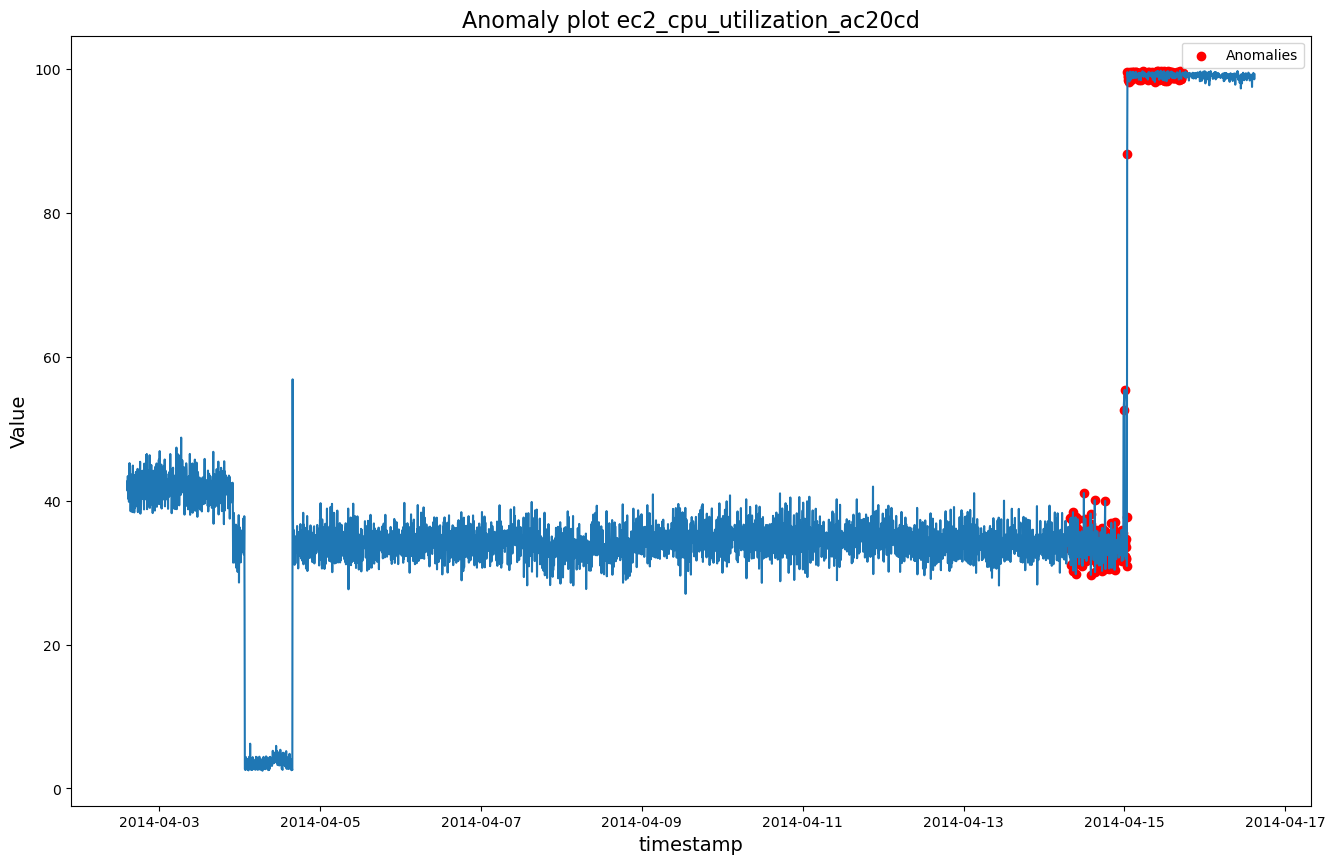

In [45]:

start_date = '2014-04-14 07:49:00'#label anomaly starts  ""2014-04-15 00:49:00""
end_date = '2014-04-15 17:34:00' #window was "2014-04-14 07:49:00.000000" - "2014-04-15 17:34:00.000000"

#anomaly anotation
file_name = 'ec2_cpu_utilization_ac20cd'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

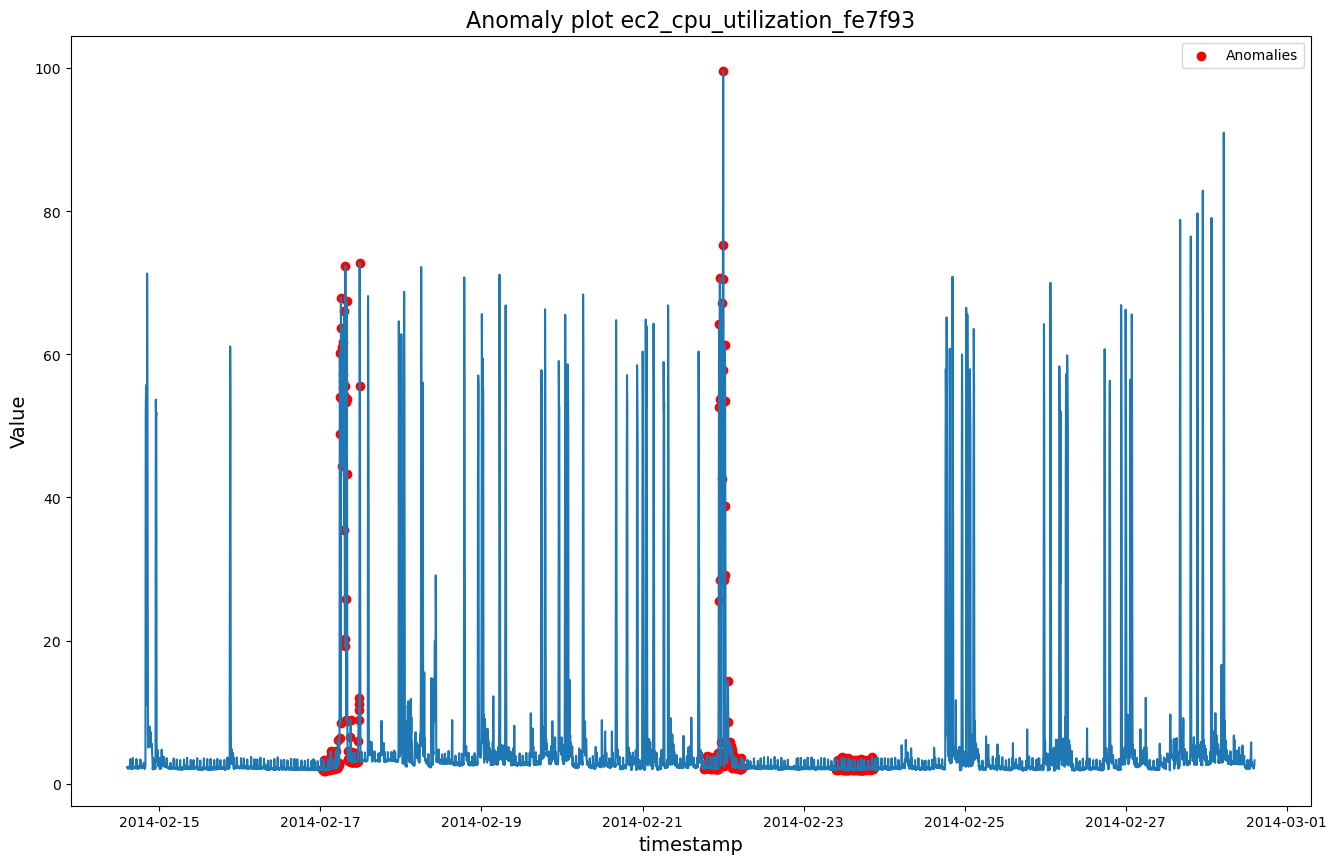

In [46]:
file_path = './NAB_New/ec2_cpu_utilization_fe7f93_anomaly.csv'
start_date = '2014-02-17 00:37:00'#label anomaly starts   "2014-02-17 06:12:00"
end_date = '2014-02-17 11:47:00' #window was "2014-02-17 00:37:00.000000" - "2014-02-17 11:47:00.000000"


#anomaly anotation
file_name = 'ec2_cpu_utilization_fe7f93'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-21 18:27:00'#label anomaly starts  "2014-02-22 00:02:00"
end_date = '2014-02-22 05:37:00' #window was "2014-02-21 18:27:00.000000" - "2014-02-22 05:37:00.000000"


filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-23 09:42:00'#label anomaly starts  "2014-02-23 15:17:00"
end_date = '2014-02-23 20:52:00' #window was "2014-02-23 09:42:00.000000" - "2014-02-23 20:52:00.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

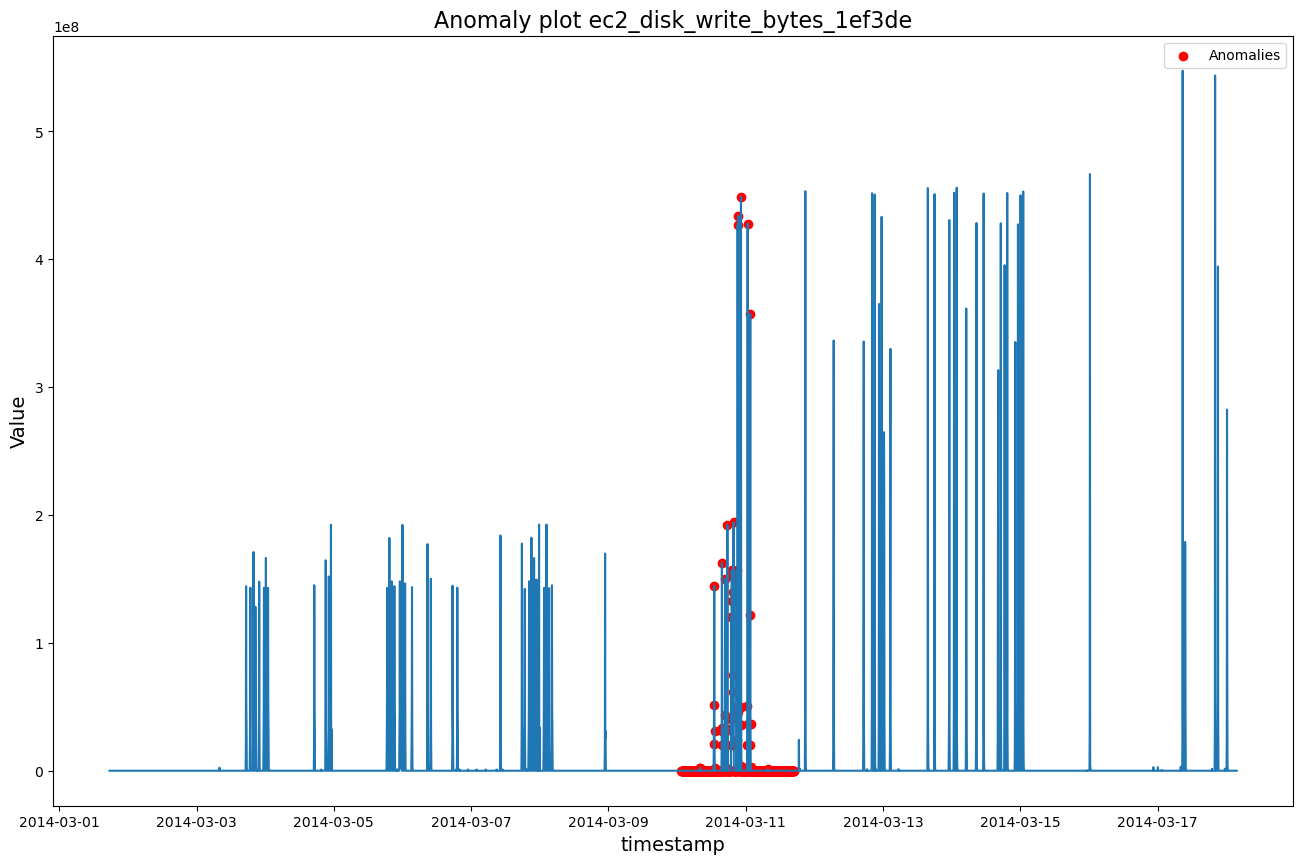

In [47]:

start_date = '2014-03-10 01:29:00'#label anomaly starts  "2014-03-10 21:09:00"
end_date = '2014-03-11 16:49:00' #window was "2014-03-10 01:29:00.000000"-"2014-03-11 16:49:00.000000"


#anomaly anotation
file_name = 'ec2_disk_write_bytes_1ef3de'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)


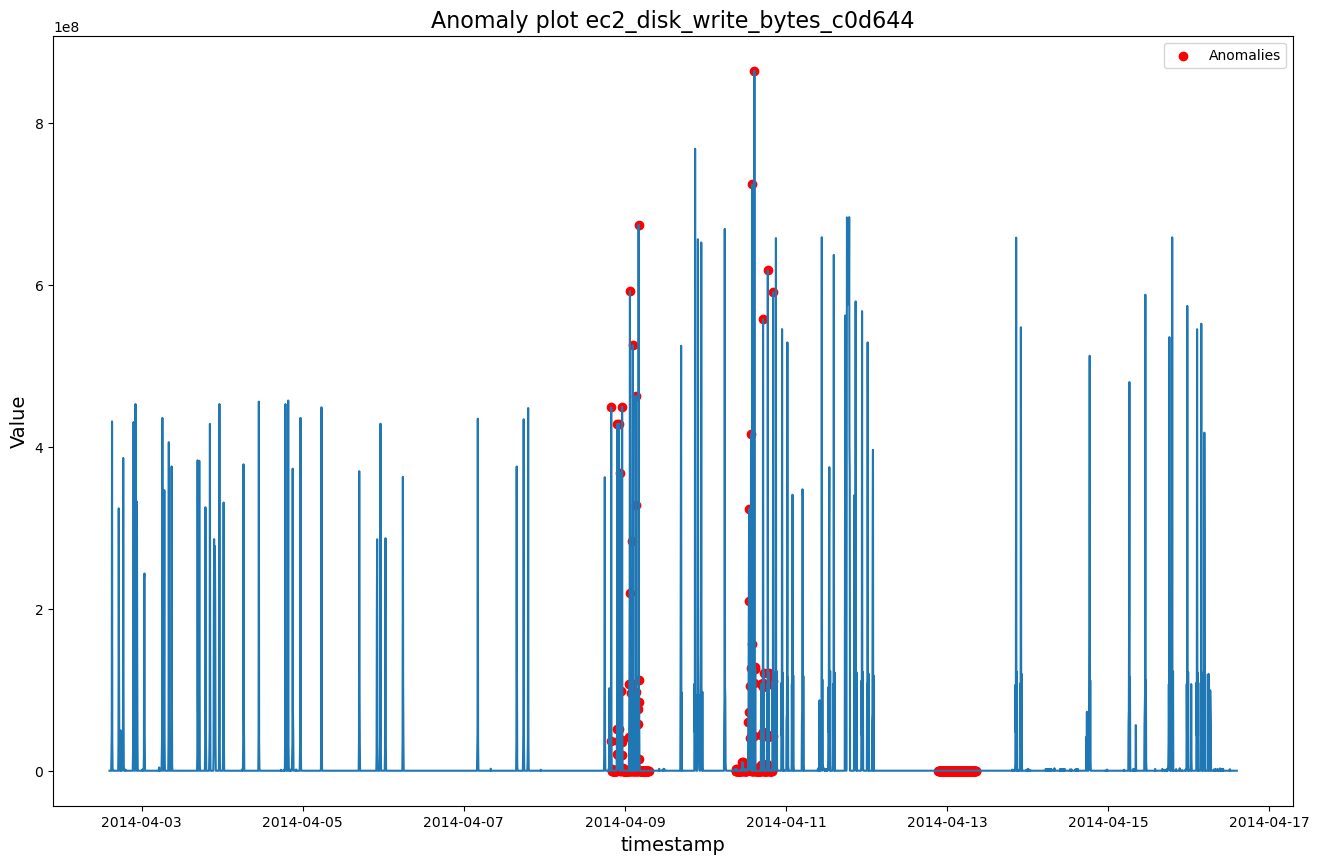

In [48]:

start_date = '2014-04-08 19:55:00'#label anomaly starts  ""2014-04-09 01:30:00""
end_date = '2014-04-09 07:05:00' #window was "2014-04-08 19:55:00.000000" - "2014-04-09 07:05:00.000000"

#anomaly anotation
file_name = 'ec2_disk_write_bytes_c0d644'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-04-10 09:00:00'#label anomaly starts  ""2014-04-10 14:35:00""
end_date = '2014-04-10 20:10:00' #window was "2014-04-10 09:00:00.000000" - "2014-04-10 20:10:00.000000"


filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-04-12 21:25:00'#label anomaly starts  ""2014-04-13 03:00:00""
end_date = '2014-04-13 08:35:00' #window was "2014-04-12 21:25:00.000000" -"2014-04-13 08:35:00.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)


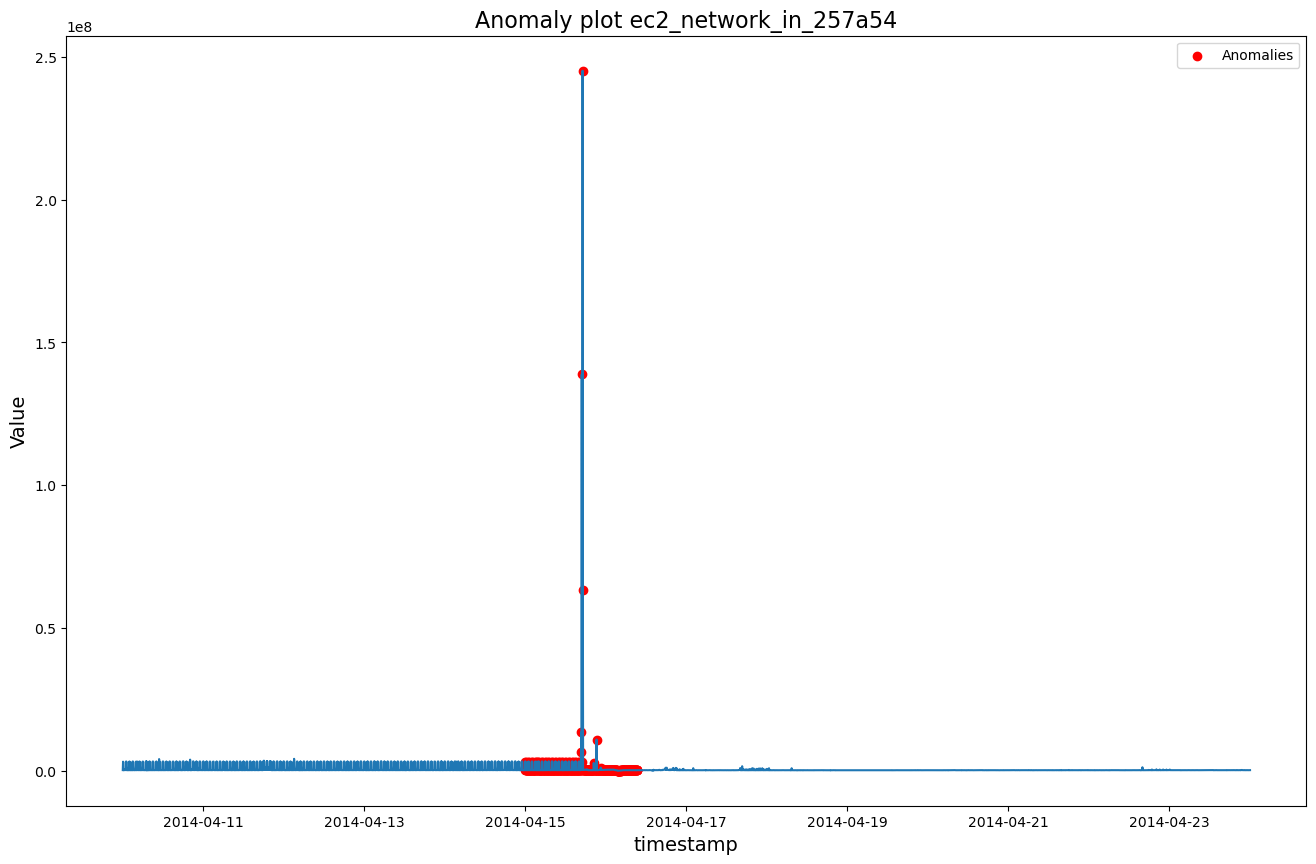

In [49]:

start_date = '2014-04-14 23:59:00'#label anomaly starts  "2014-04-15 16:44:00"
end_date = '2014-04-16 09:29:00' #window was "2014-04-14 23:59:00.000000" - "2014-04-16 09:29:00.000000"

#anomaly anotation
file_name = 'ec2_network_in_257a54'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

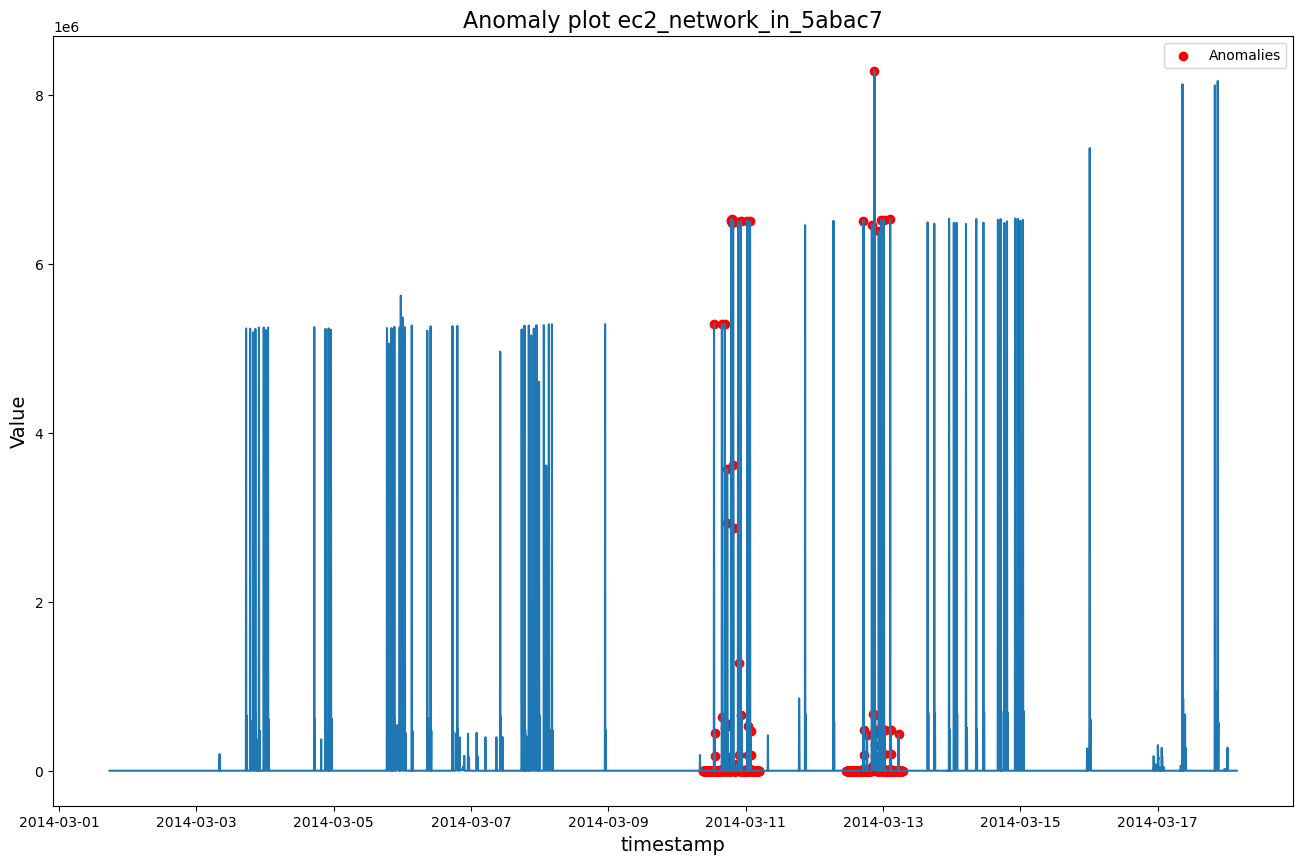

In [50]:

start_date = '2014-03-10 09:06:00'#label anomaly starts  "2014-03-10 18:56:00"
end_date = '2014-03-11 04:46:00' #window was "2014-03-10 09:06:00" - "2014-03-11 04:46:00"

#anomaly anotation
file_name = 'ec2_network_in_5abac7'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-03-12 11:11:00'#label anomaly starts  "2014-03-12 21:01:00"
end_date = '2014-03-13 06:51:00' #window was "2014-03-12 11:11:00" - "2014-03-13 06:51:00"


filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

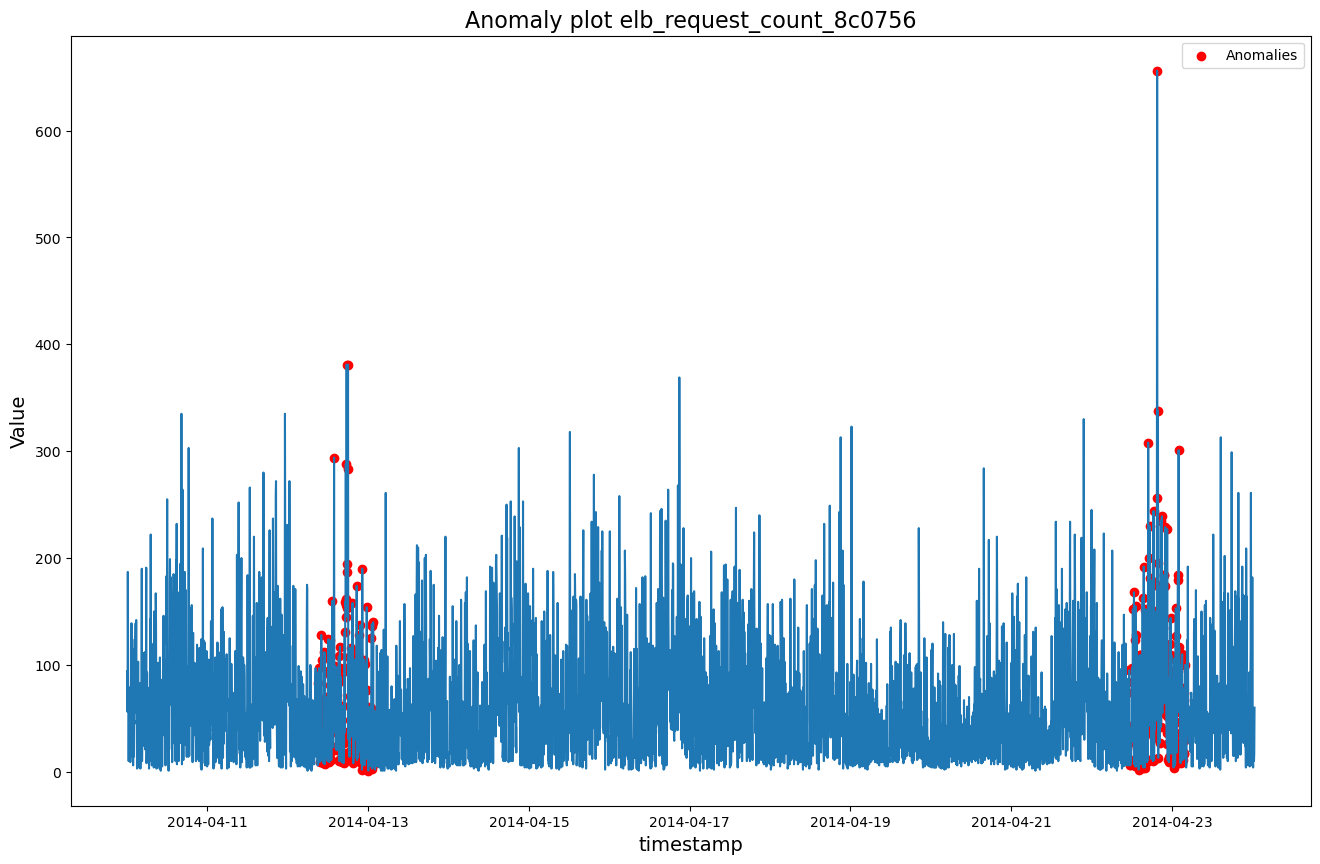

In [51]:

start_date = '2014-04-12 09:04:00'#label anomaly starts  "2014-04-12 17:24:00"
end_date = '2014-04-13 01:44:00' #window was "2014-04-12 09:04:00" - "2014-04-13 01:44:00"

#anomaly anotation
file_name = 'elb_request_count_8c0756'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-04-22 11:14:00'#label anomaly starts  "2014-04-22 19:34:00"
end_date = '2014-04-23 03:54:00' #window was "2014-04-22 11:14:00" - "2014-04-23 03:54:00"


filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

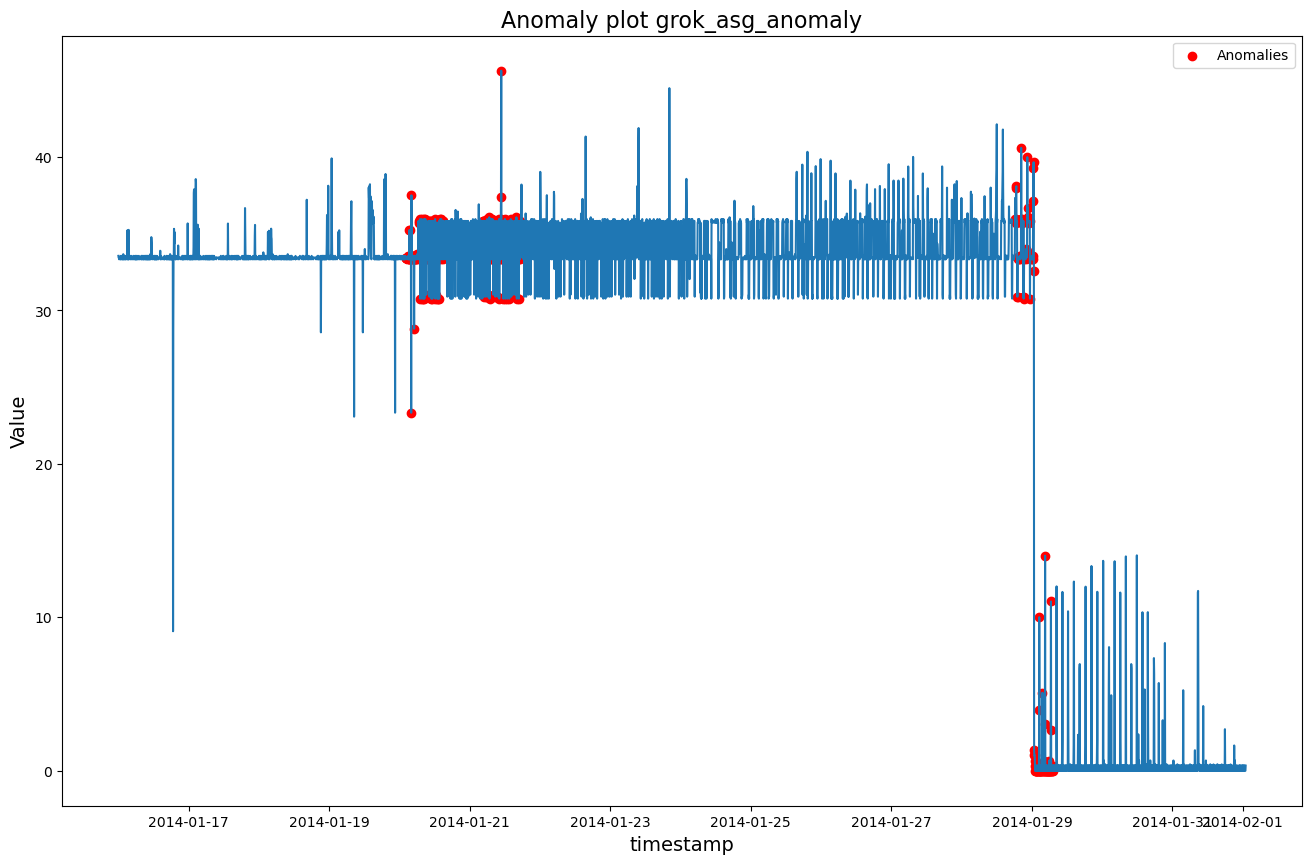

In [52]:

start_date = '2014-01-20 02:05:00'#label anomaly starts  "2014-01-20 08:30:00"
end_date = '2014-01-20 14:55:00' #window was "2014-01-20 02:05:00"-"2014-01-20 14:55:00"


#anomaly anotation
file_name = 'grok_asg_anomaly'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-01-21 04:20:00'#label anomaly starts  "2014-01-21 10:45:00"
end_date = '2014-01-21 17:10:00' #window was "2014-01-21 04:20:00" - "2014-01-21 17:10:00"


filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-01-28 18:20:00'#label anomaly starts  "2014-01-29 00:45:00"
end_date = '2014-01-29 07:10:00' #window was "2014-01-28 18:20:00" - "2014-01-29 07:10:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

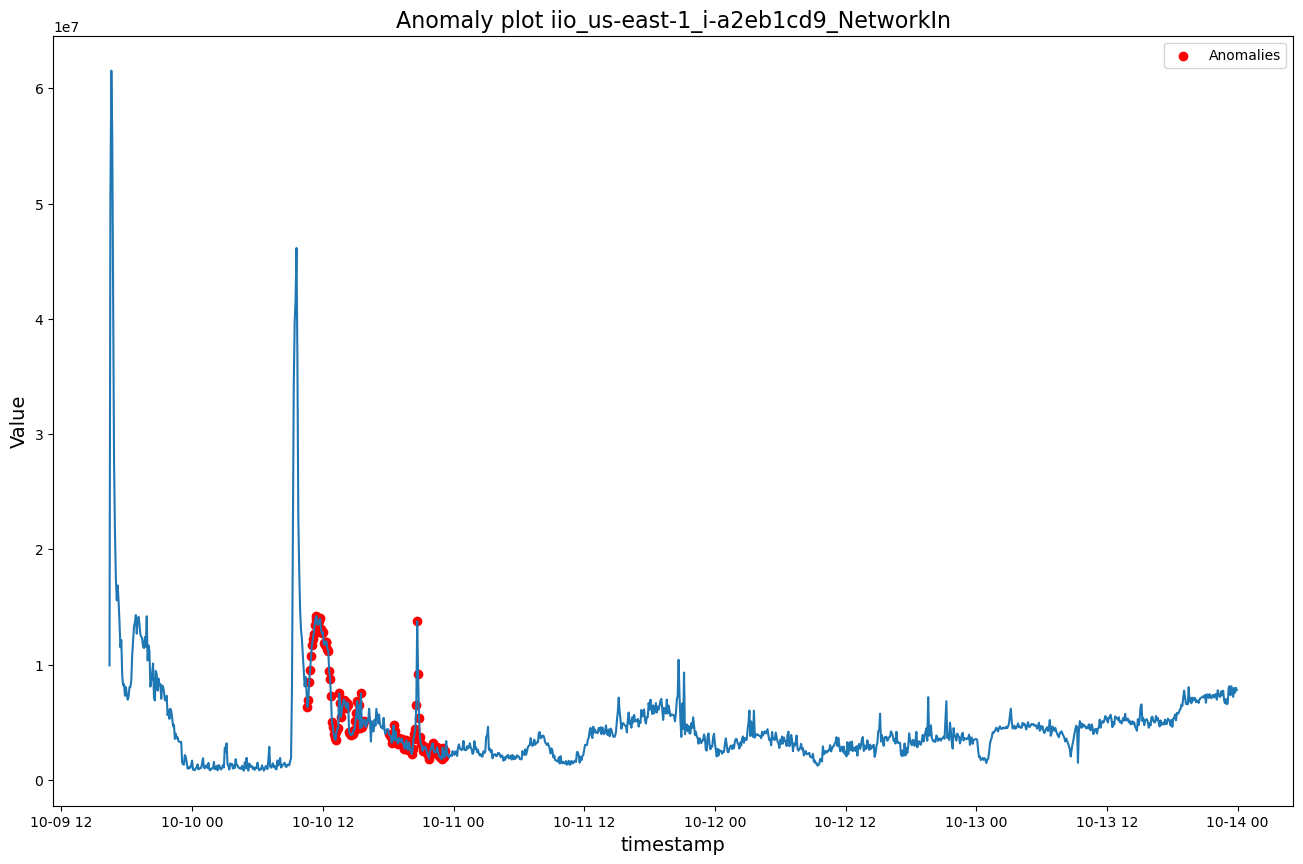

In [53]:

start_date = '2013-10-10 10:35:00'#label anomaly starts  "2013-10-10 09:35:00""
end_date = '2013-10-10 15:45:00' #window was "2013-10-10 10:35:00"-"2013-10-10 15:45:00"

#anomaly anotation
file_name = 'iio_us-east-1_i-a2eb1cd9_NetworkIn'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2013-10-10 18:05:00'#label anomaly starts  "2013-10-10 20:40:00"
end_date = '2013-10-10 23:15:00' #window was "2013-10-10 18:05:00"-"2013-10-10 23:15:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

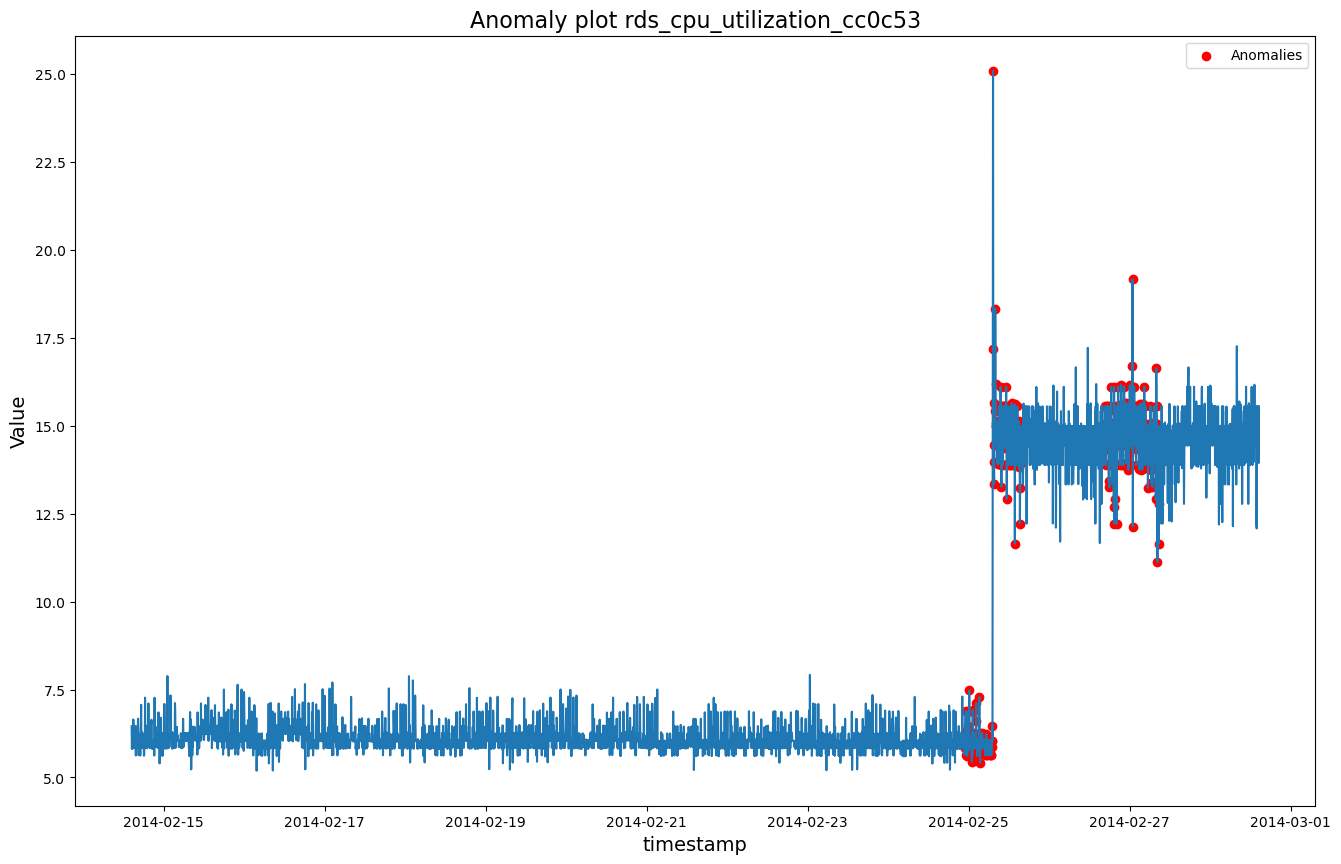

In [54]:

start_date = '2014-02-24 22:50:00'#label anomaly starts  "2014-02-25 07:15:00
end_date = '2014-02-25 15:35:00' #window was "2014-02-24 22:50:00"-"2014-02-25 15:35:00"


#anomaly anotation
file_name = 'rds_cpu_utilization_cc0c53'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-26 16:30:00'#label anomaly starts  "2014-02-27 00:50:00"
end_date = '2014-02-27 09:10:00' #window was "2014-02-26 16:30:00"-"2014-02-27 09:10:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

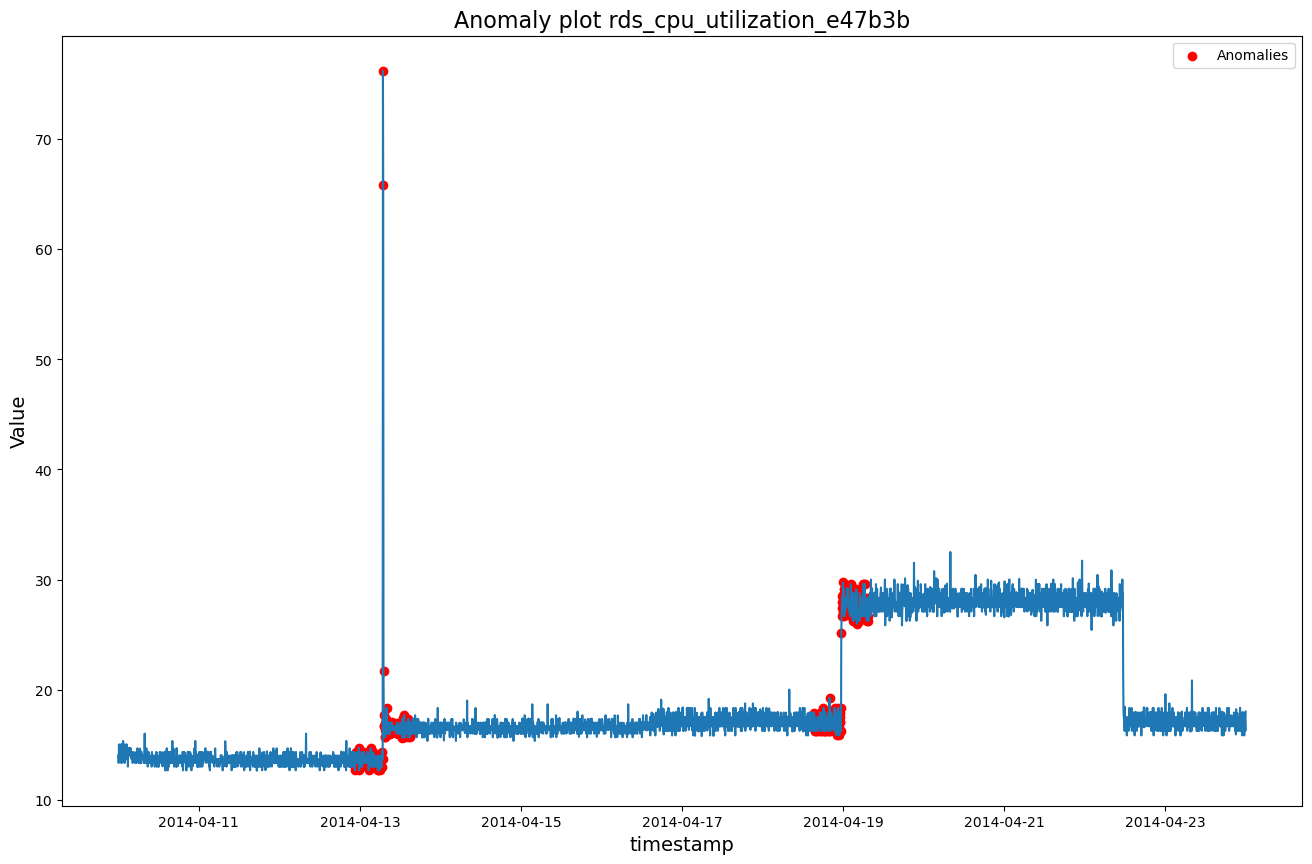

In [55]:

start_date = '2014-04-12 22:32:00'#label anomaly starts  "2014-04-13 06:52:00"
end_date = '2014-04-13 15:12:00' #window was "2014-04-12 22:32:00" - "2014-04-13 15:12:00"


#anomaly anotation
file_name = 'rds_cpu_utilization_e47b3b'
df = pd.read_csv(f'NAB/realAWSCloudwatch/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-04-18 15:07:00'#label anomaly starts  "2014-04-18 23:27:00"
end_date = '2014-04-19 07:47:00' #window was "2014-04-18 15:07:00" - "2014-04-19 07:47:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

### RealAdExchange collection

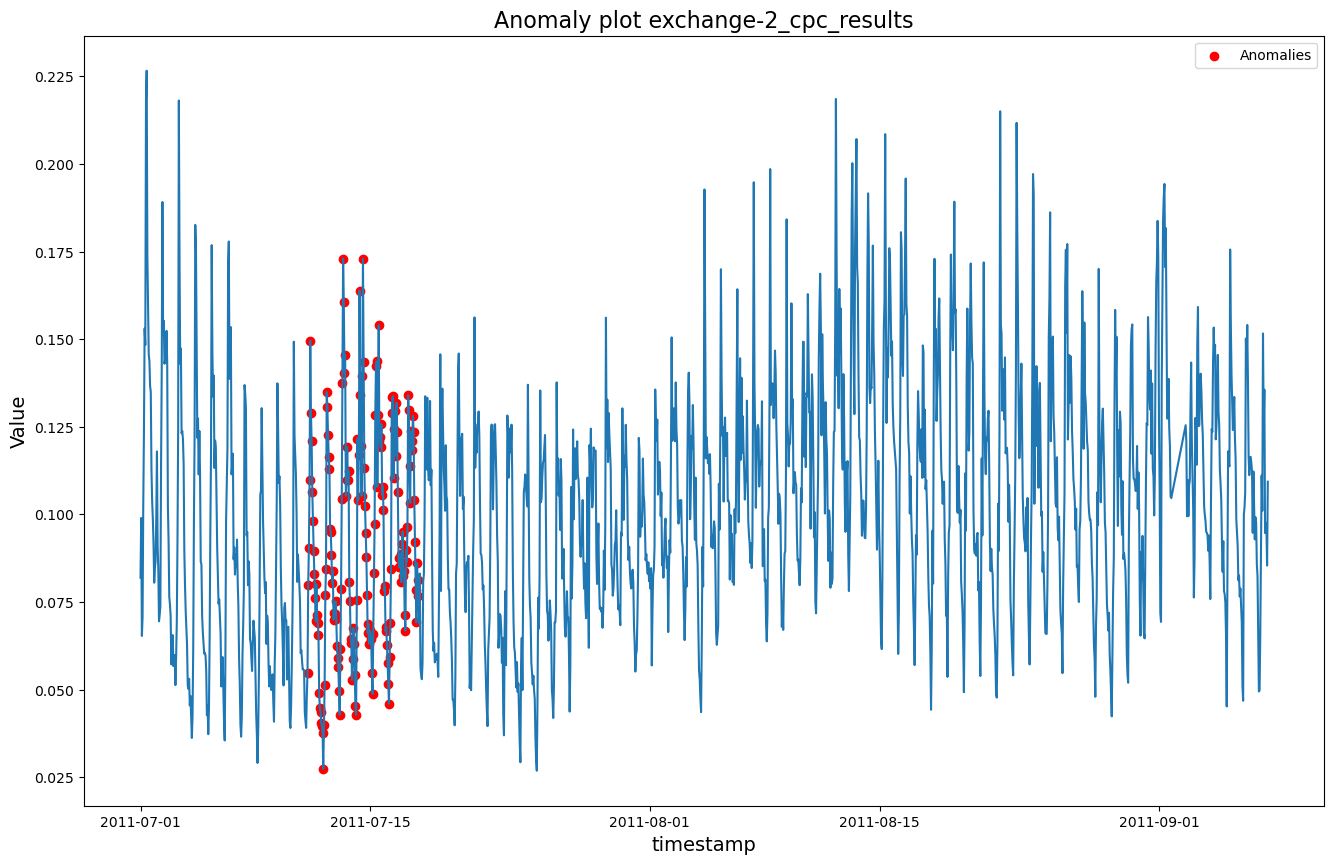

In [56]:

start_date = '2011-07-11 04:00:01'#label anomaly starts  "2011-07-14 13:00:01"
end_date = '2011-07-17 22:00:01' #window was "2011-07-11 04:00:01"-"2011-07-17 22:00:01"

#anomaly anotation
file_name = 'exchange-2_cpc_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

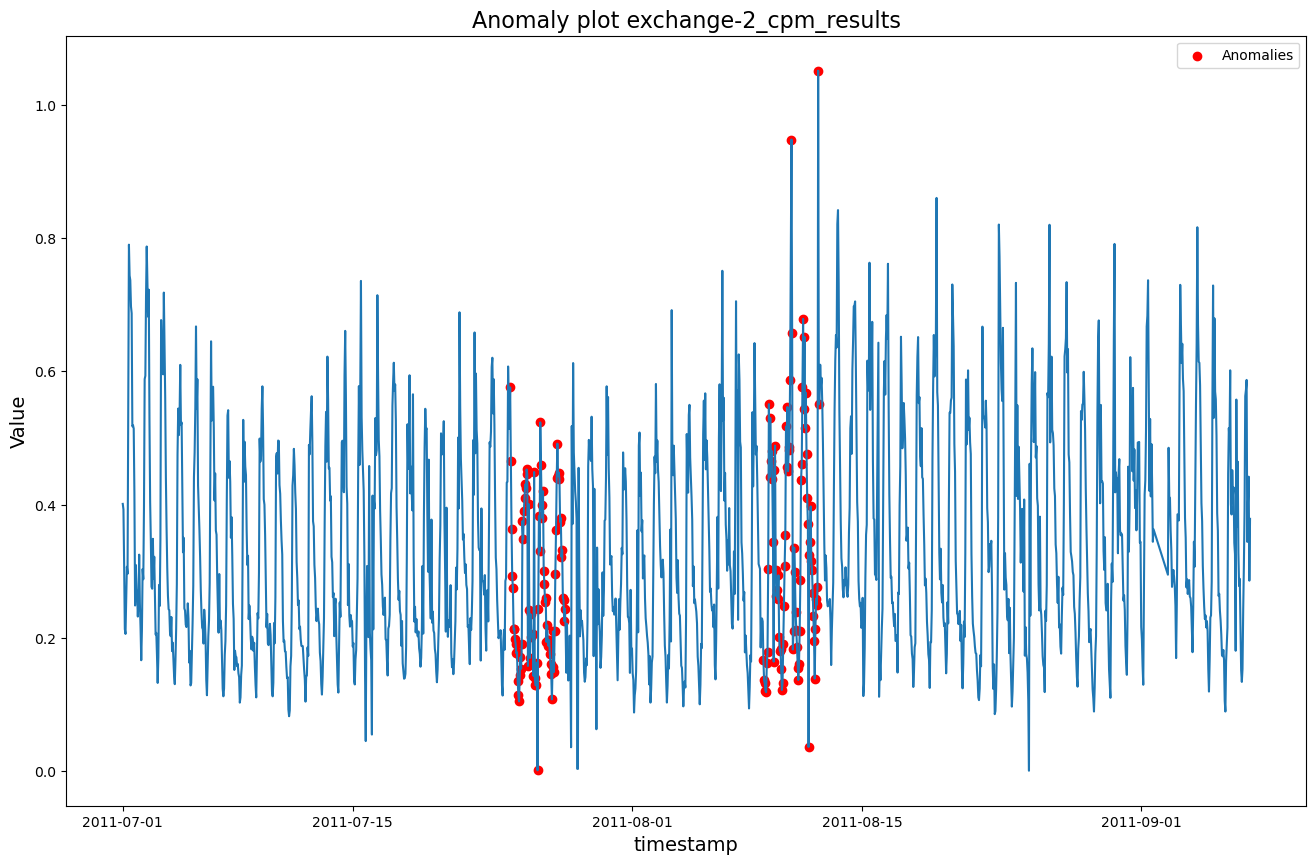

In [57]:

start_date = '2011-07-24 14:00:01'#label anomaly starts  "2011-07-26 06:00:01"
end_date = '2011-07-27 22:00:01' #window was "2011-07-24 14:00:01"-"2011-07-27 22:00:01"

file_name = 'exchange-2_cpm_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-08-09 00:00:01'#label anomaly starts  "2011-08-10 17:00:01"
end_date = '2011-08-12 09:00:01' #window was ""2011-08-09 00:00:01"-"2011-08-12 09:00:01"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

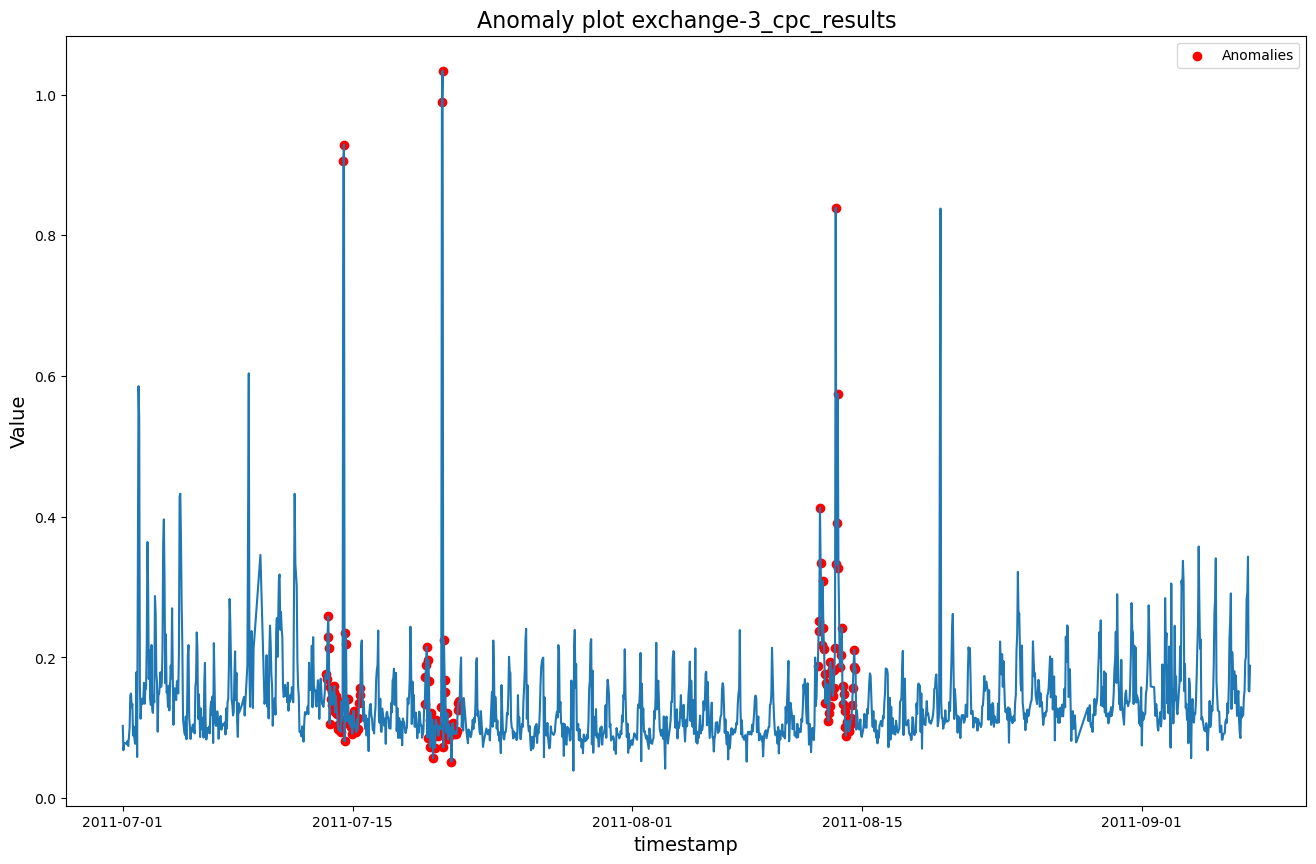

In [58]:

start_date = '2011-07-13 09:15:01'#label anomaly starts  "2011-07-14 10:15:01"
end_date = '2011-07-15 11:15:01' #window was "2011-07-13 09:15:01"-"2011-07-15 11:15:01"

file_name = 'exchange-3_cpc_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-07-19 09:15:01'#label anomaly starts  "2011-07-20 10:15:01"
end_date = '2011-07-21 11:15:01' #window was "2011-07-19 09:15:01"-"2011-07-21 11:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-08-12 07:15:01'#label anomaly starts  "2011-08-13 10:15:01"
end_date = '2011-08-14 13:15:01' #window was "2011-08-12 07:15:01"-"2011-08-14 13:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

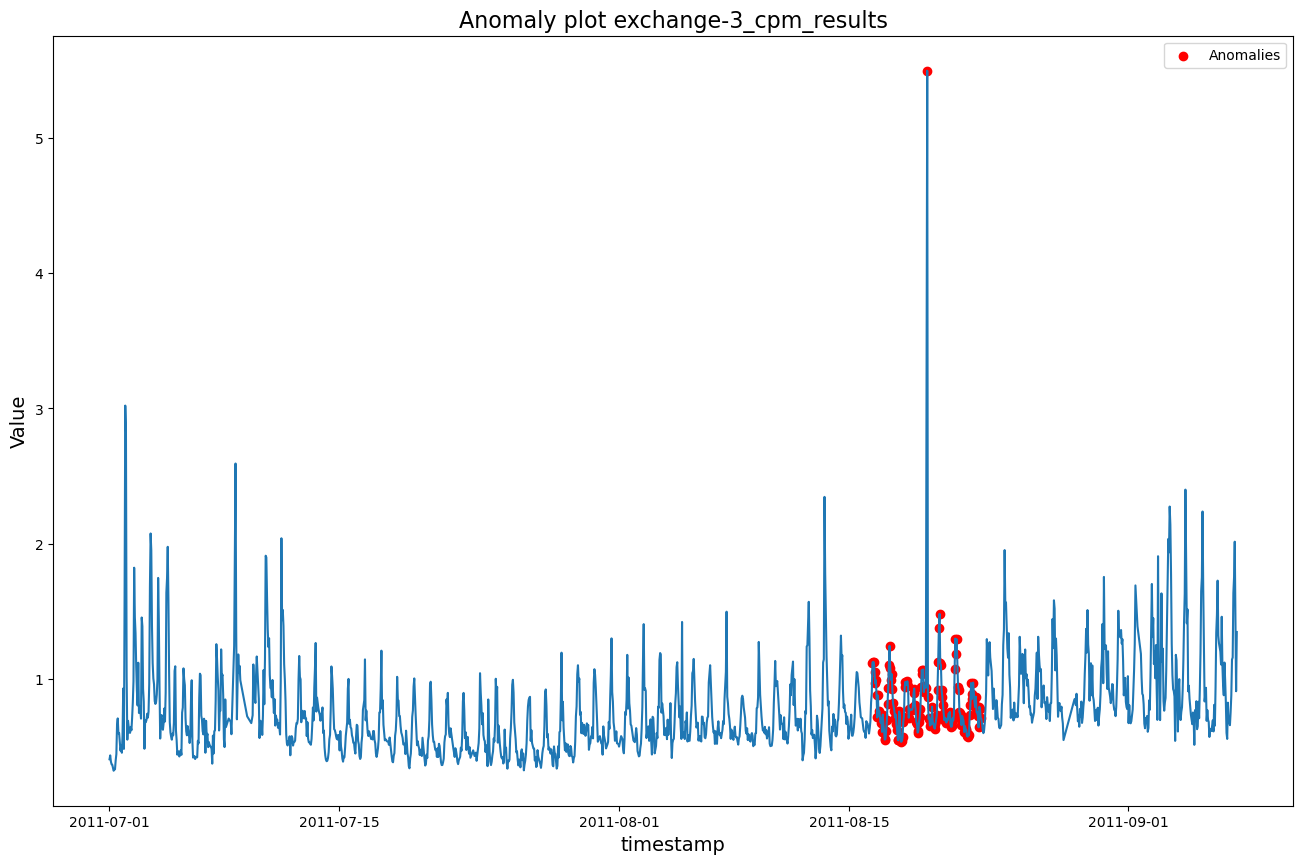

In [59]:

start_date = '2011-08-16 10:15:01'#label anomaly starts  "2011-08-19 18:15:01"
end_date = '2011-08-23 00:15:01' #window was "2011-08-16 10:15:01"-"2011-08-23 00:15:01"

file_name = 'exchange-3_cpm_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

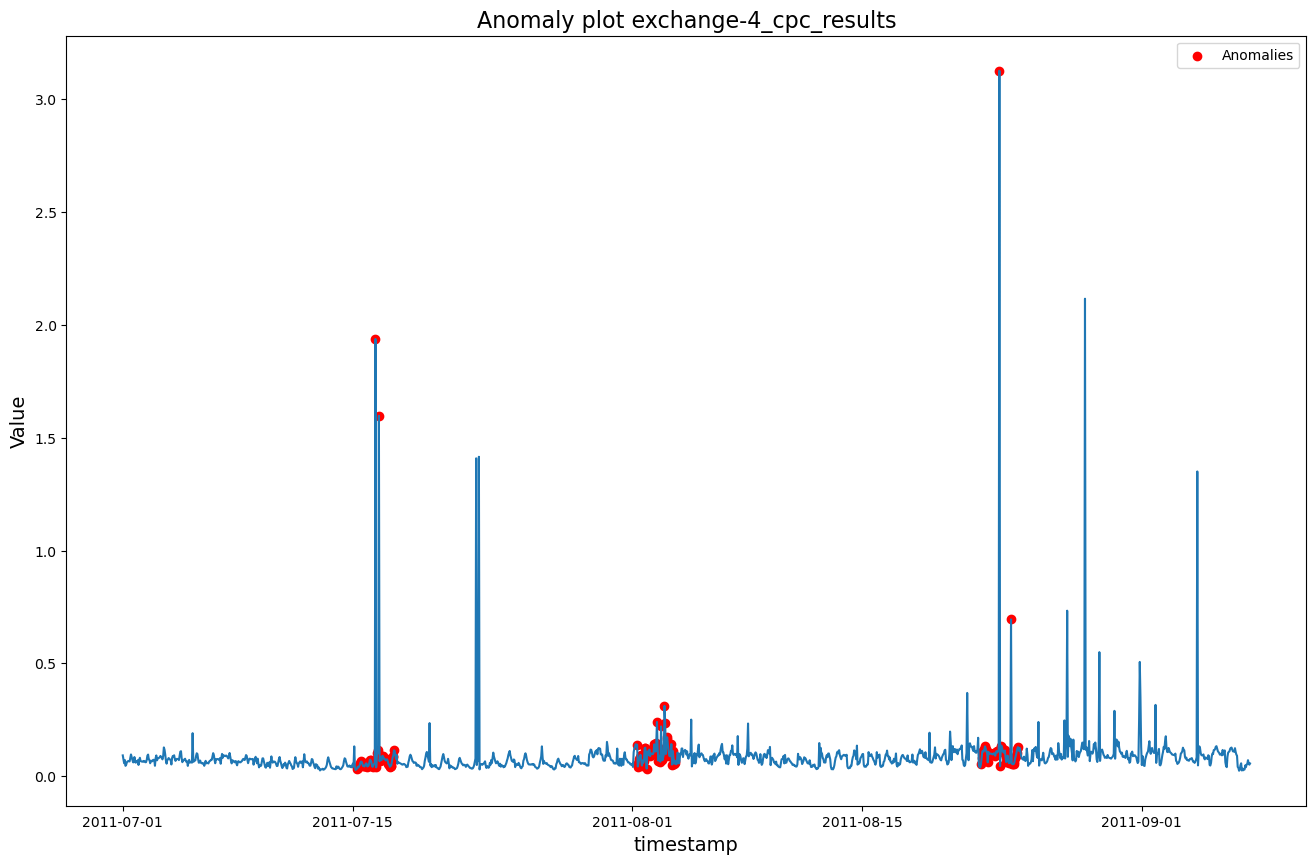

In [60]:

start_date = '2011-07-15 06:15:01'#label anomaly starts  "2011-07-16 09:15:01"
end_date = '2011-07-17 12:15:01' #window was "2011-07-15 06:15:01"-"2011-07-17 12:15:01"

file_name = 'exchange-4_cpc_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-08-01 07:15:01'#label anomaly starts  "2011-08-02 12:15:01""
end_date = '2011-08-03 15:15:01' #window was "2011-08-01 07:15:01"-"2011-08-03 15:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-08-22 05:15:01'#label anomaly starts  "2011-08-23 08:15:01"
end_date = '2011-08-24 11:15:01' #window was "2011-08-22 05:15:01"-"2011-08-24 11:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

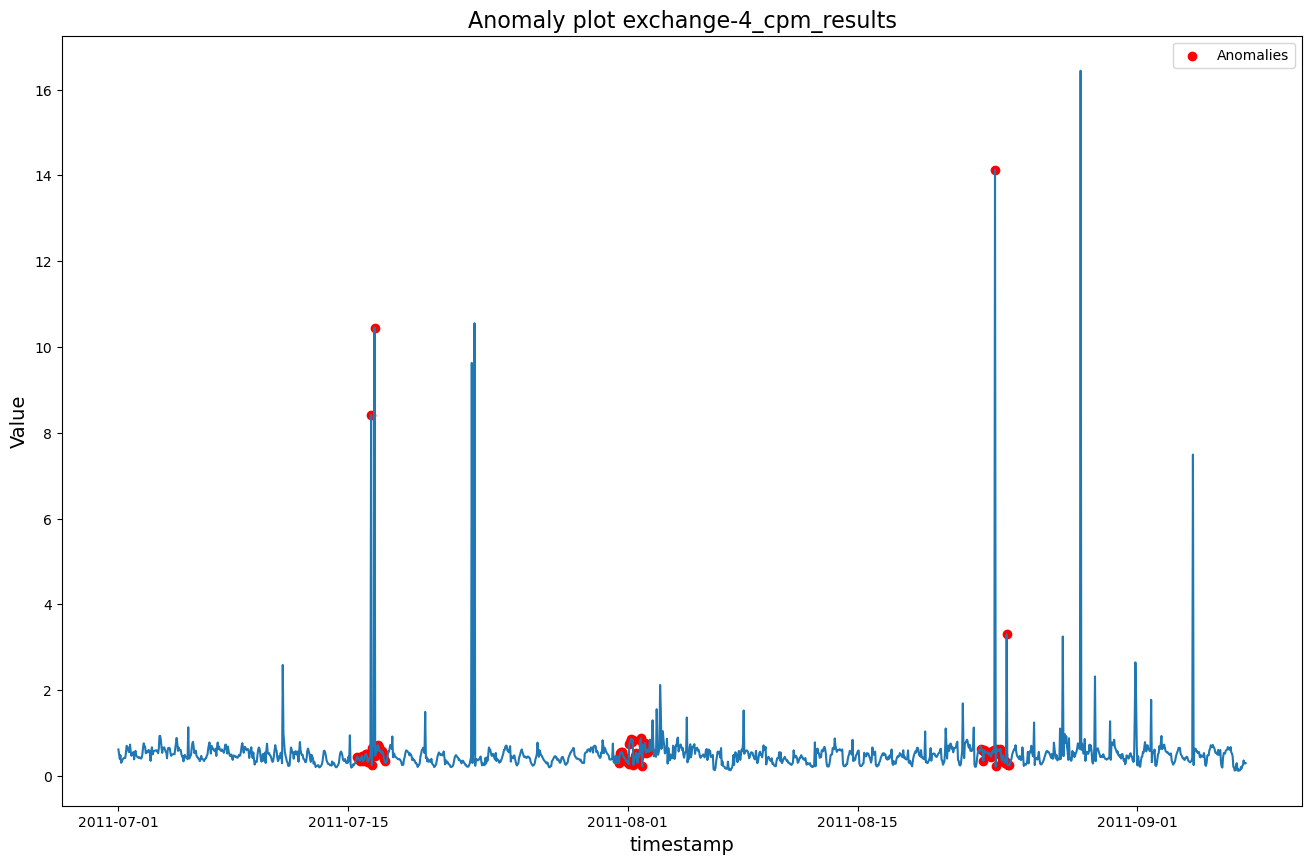

In [61]:

start_date = '2011-07-15 13:15:01'#label anomaly starts  "2011-07-16 09:15:01"
end_date = '2011-07-17 05:15:01' #window was "2011-07-15 13:15:01"-"2011-07-17 05:15:01"

file_name = 'exchange-4_cpm_results'
df = pd.read_csv(f'NAB/realAdExchange/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-07-31 11:15:01'#label anomaly starts  "2011-08-01 07:15:01"
end_date = '2011-08-02 05:15:01' #window was ""2011-07-31 11:15:01"-"2011-08-02 05:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2011-08-22 12:15:01'#label anomaly starts  "2011-08-23 08:15:01"
end_date = '2011-08-24 04:15:01' #window was ""2011-08-22 12:15:01"-"2011-08-24 04:15:01"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

### RealKnownCause Collection

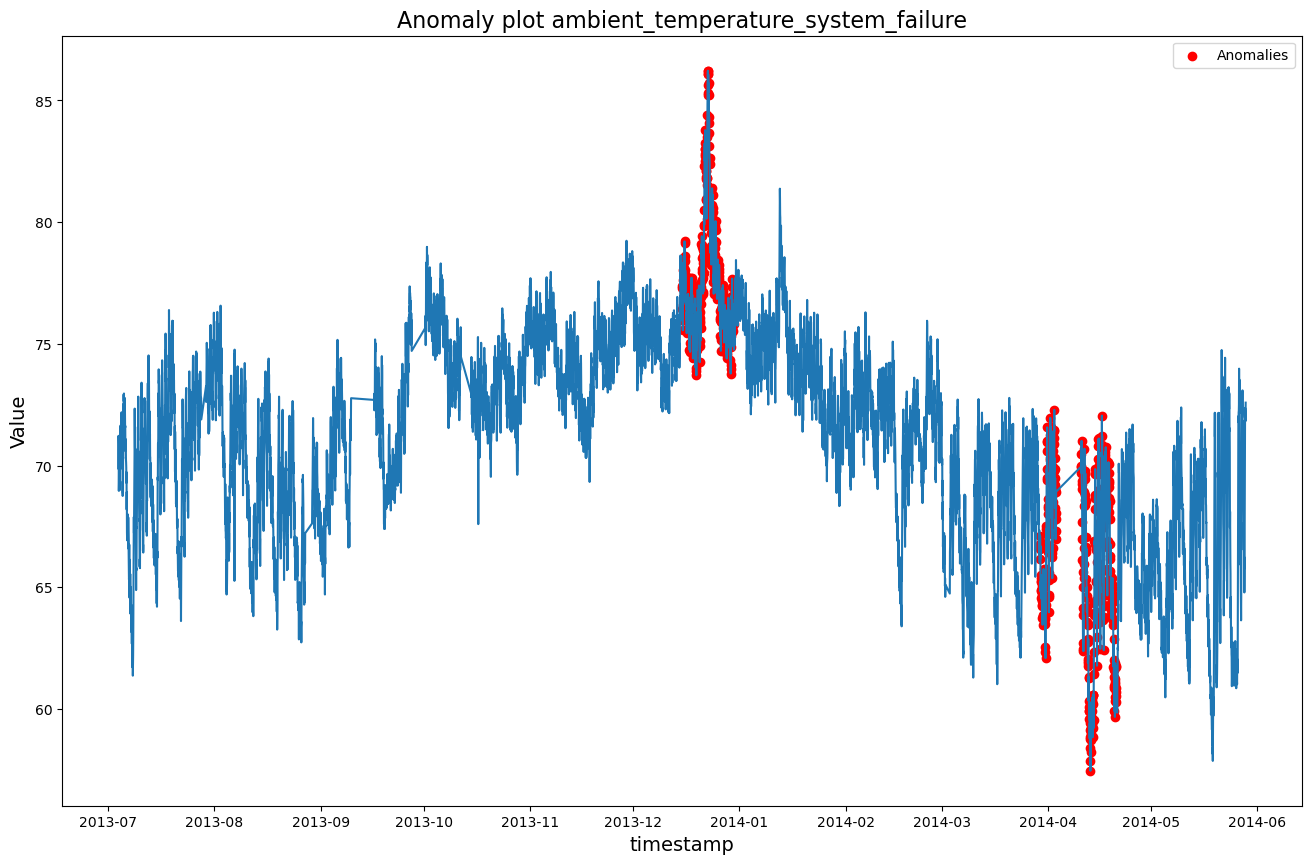

In [62]:

start_date = '2013-12-15 07:00:00'#label anomaly starts  "2013-12-22 20:00:00"
end_date = '2013-12-30 09:00:00' #window was "2013-12-15 07:00:00","2013-12-30 09:00:00"

file_name = 'ambient_temperature_system_failure'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-03-29 15:00:00'#label anomaly starts  "2014-04-13 09:00:00"
end_date = '2014-04-20 22:00:00' #window was "2014-03-29 15:00:00","2014-04-20 22:00:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

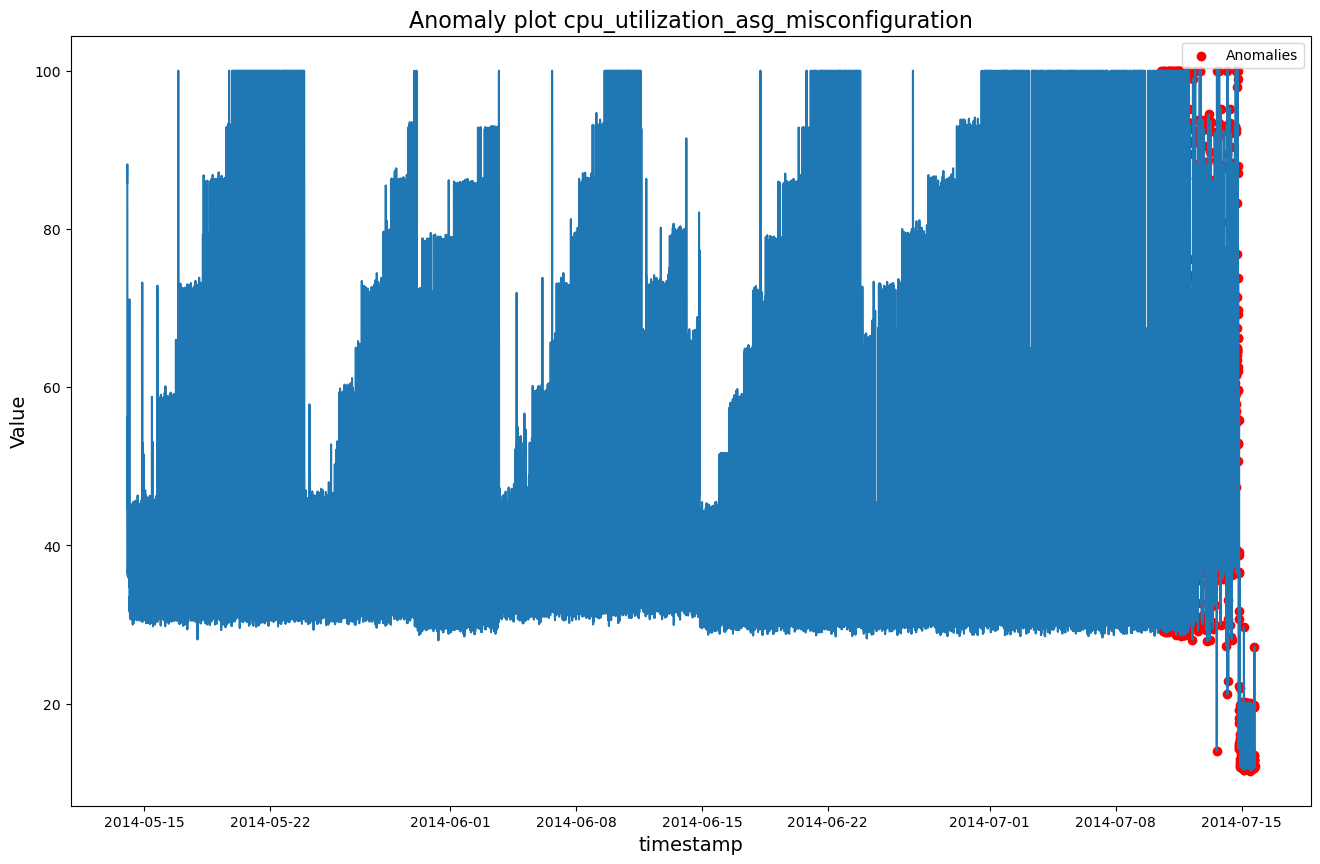

In [63]:
start_date = '2014-07-10 12:29:00'#label anomaly starts  ""2014-07-12 02:04:00""
end_date = '2014-07-15 17:19:00' #window was ""2014-07-10 12:29:00"-"2014-07-15 17:19:00"

file_name = 'cpu_utilization_asg_misconfiguration'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-07-14 21:44:00'#label anomaly starts  "2014-07-14 21:44:00"
end_date = '2014-07-14 21:44:00' 


filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

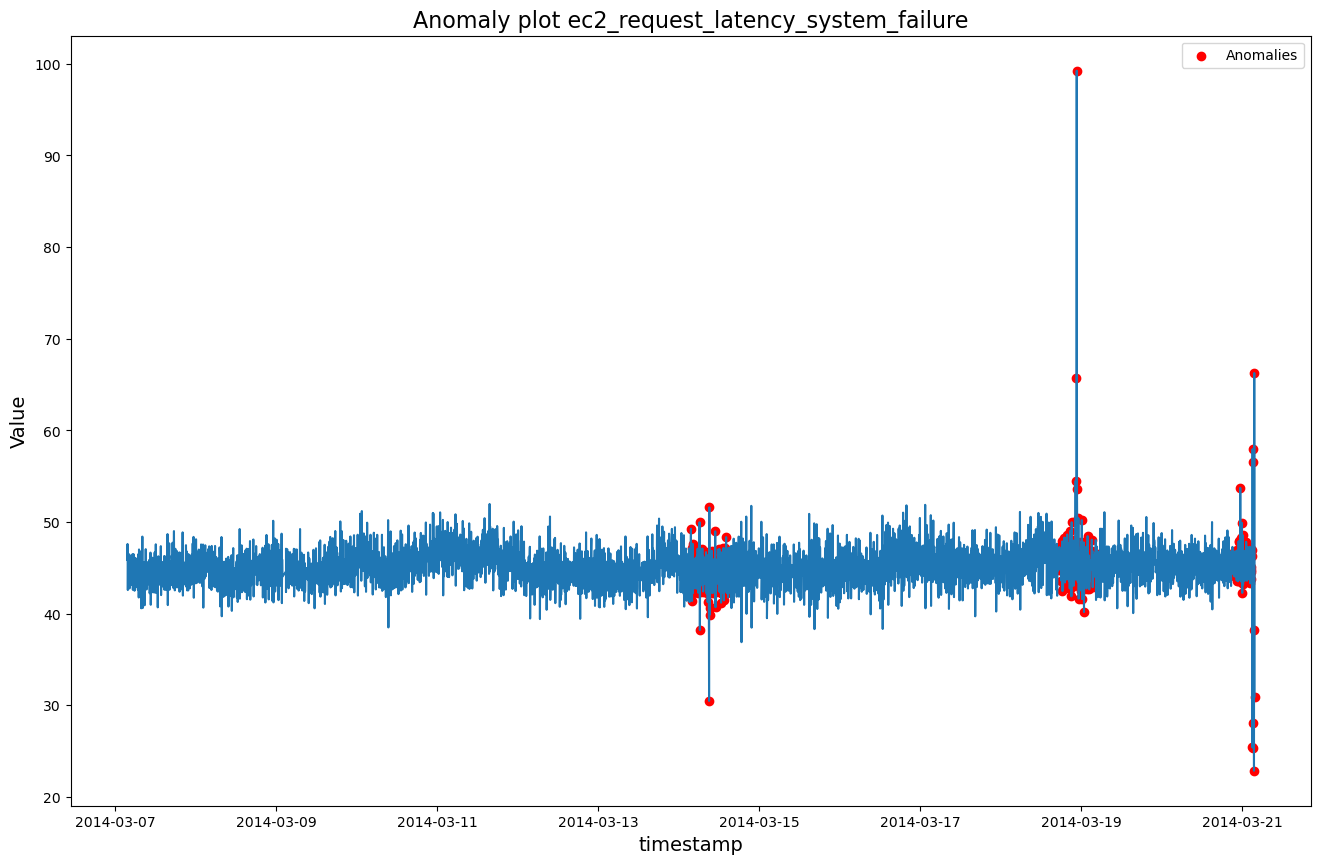

In [64]:
start_date = '2014-03-14 03:31:00'#label anomaly starts  "2014-03-14 09:06:00"
end_date = '2014-03-14 14:41:00' #window was "2014-03-14 03:31:00","2014-03-14 14:41:00"

file_name = 'ec2_request_latency_system_failure'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-03-18 17:06:00'#label anomaly starts  "2014-03-18 22:41:00"
end_date = '2014-03-19 04:16:00' #window was "2014-03-18 17:06:00","2014-03-19 04:16:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-03-20 21:26:00'#label anomaly starts  "2014-03-21 03:01:00"
end_date = '2014-03-21 03:41:00' #window was """2014-03-20 21:26:00","2014-03-21 03:41:00""
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

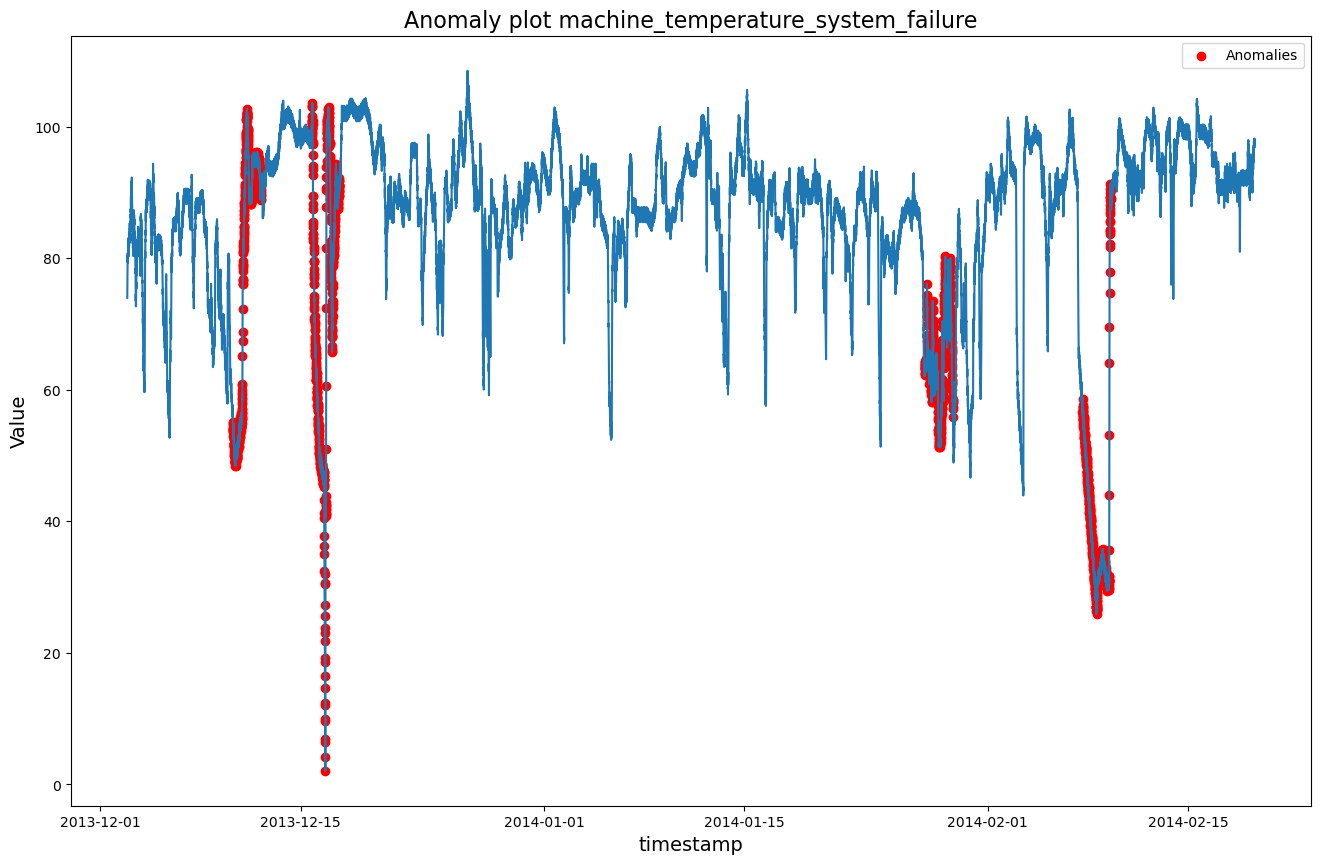

In [65]:
start_date = '2013-12-10 06:25:00'#label anomaly starts  "2013-12-11 06:00:00",
end_date = '2013-12-12 05:35:00' #window was "2013-12-10 06:25:00","2013-12-12 05:35:00"

file_name = 'machine_temperature_system_failure'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2013-12-15 17:50:00'#label anomaly starts  "2013-12-16 17:25:00",
end_date = '2013-12-17 17:00:00' #window was "2013-12-15 17:50:00","2013-12-17 17:00:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-01-27 14:20:00'#label anomaly starts  "2014-01-28 13:55:00",
end_date = '2014-01-29 13:30:00' #window was "2014-01-27 14:20:00","2014-01-29 13:30:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-02-07 14:55:00'#label anomaly starts  "2014-02-08 14:30:00""
end_date = '2014-02-09 14:05:00' #window was """2014-02-07 14:55:00","2014-02-09 14:05:00"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

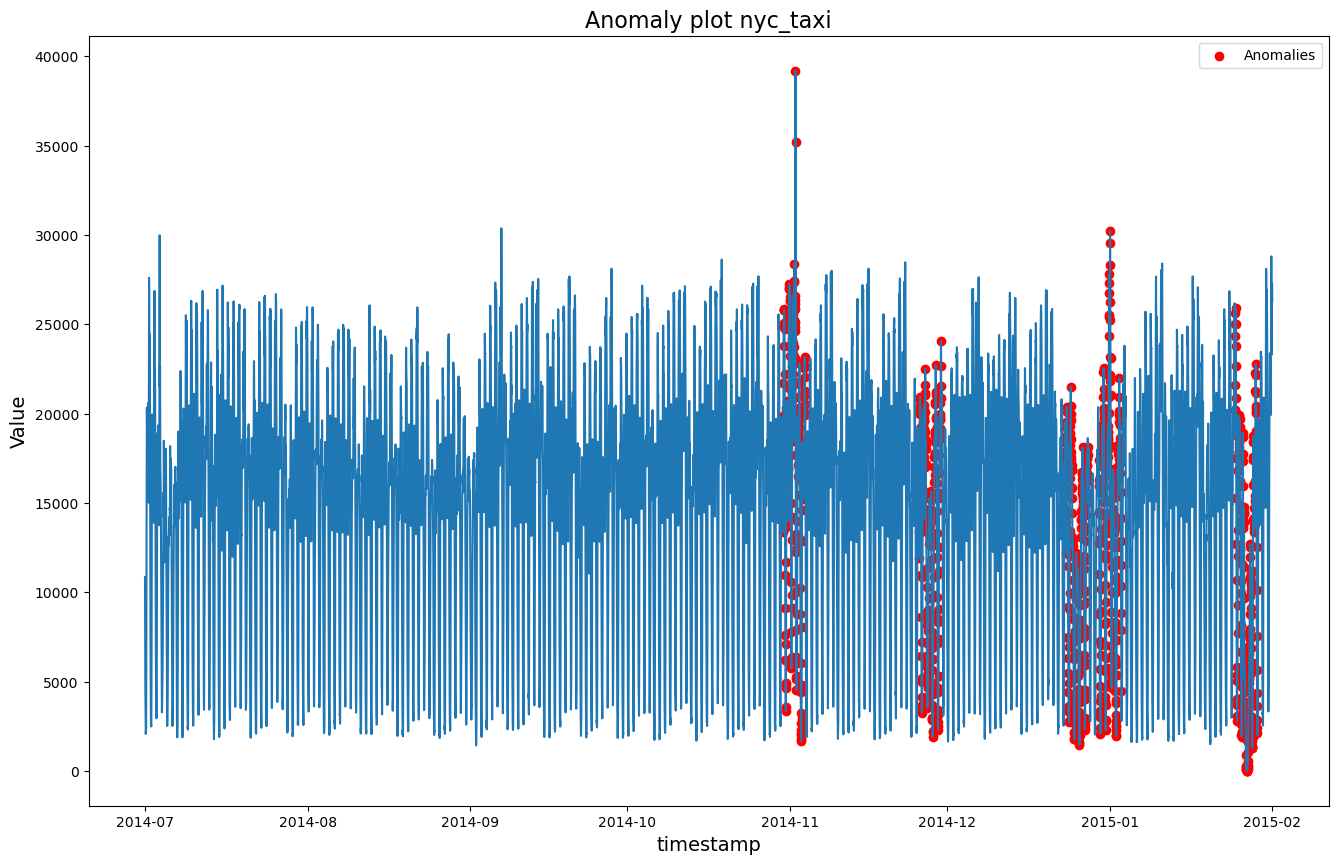

In [66]:
start_date = '2014-10-30 15:30:00'#label anomaly starts  ""2014-11-01 19:00:00",,
end_date = '2014-11-03 22:30:00' #window was "2014-10-30 15:30:00","2014-11-03 22:30:00"

file_name = 'nyc_taxi'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-11-25 12:00:00'#label anomaly starts  ""2014-11-27 15:30:00","
end_date = '2014-11-29 19:00:00' #window was "2014-11-25 12:00:00","2014-11-29 19:00:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-12-23 11:30:00'#label anomaly starts  ""2014-12-25 15:00:00""
end_date = '2014-12-27 18:30:00' #window was  "2014-12-23 11:30:00","2014-12-27 18:30:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-12-29 21:30:00'#label anomaly starts  "2015-01-01 01:00:00","
end_date = '2015-01-03 04:30:00' #window was "2014-12-29 21:30:00","2015-01-03 04:30:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-01-24 20:30:00'#label anomaly starts  ""2015-01-27 00:00:00"""
end_date = '2015-01-29 03:30:00' #window was "2015-01-24 20:30:00","2015-01-29 03:30:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

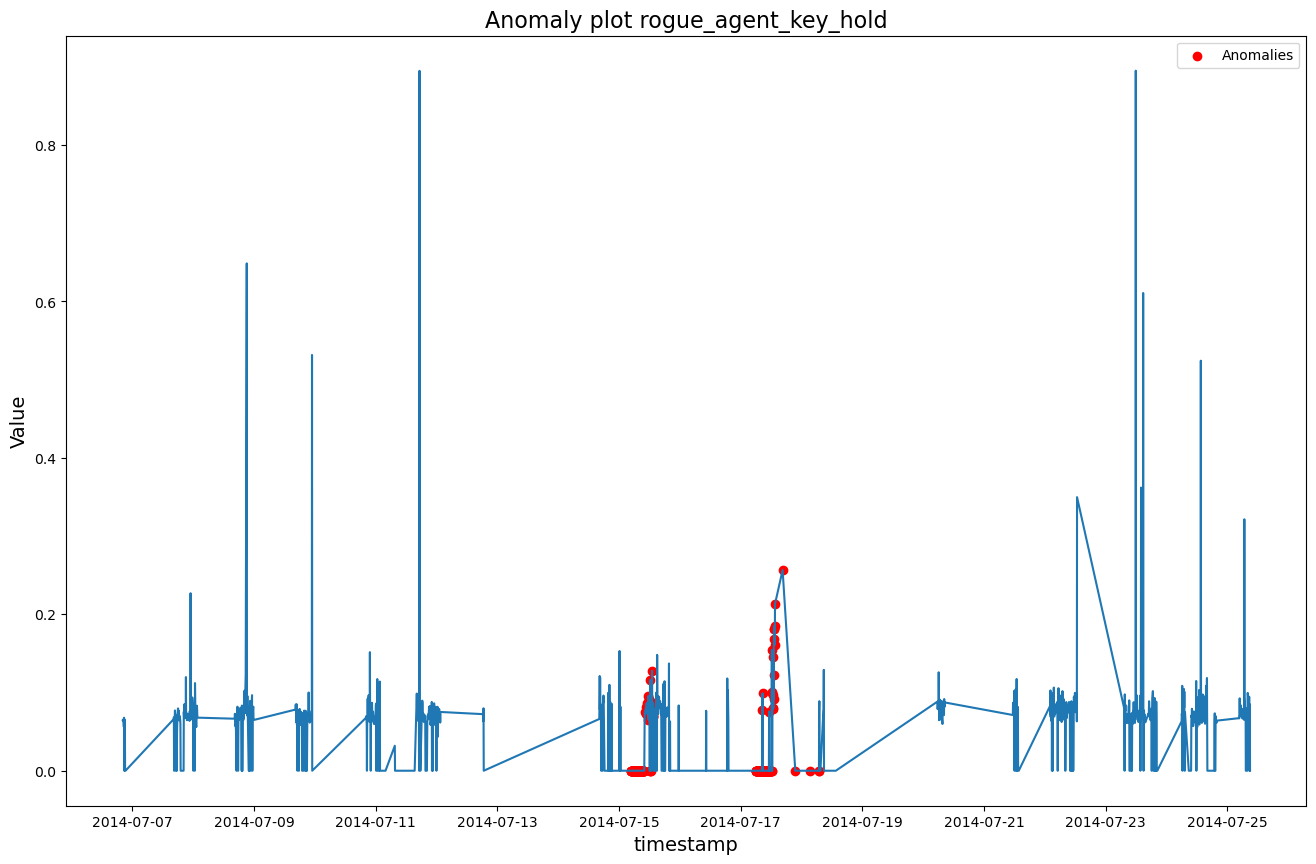

In [67]:
start_date = '2014-07-15 04:35:00'#label anomaly starts  "2014-07-15 08:30:00",
end_date = '2014-07-15 13:25:00' #window was """2014-07-15 04:35:00","2014-07-15 13:25:00"

file_name = 'rogue_agent_key_hold'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-07-17 05:50:00'#label anomaly starts  "2014-07-17 09:50:00"
end_date = '2014-07-18 06:45:00' #window was """2014-07-17 05:50:00","2014-07-18 06:45:00""

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

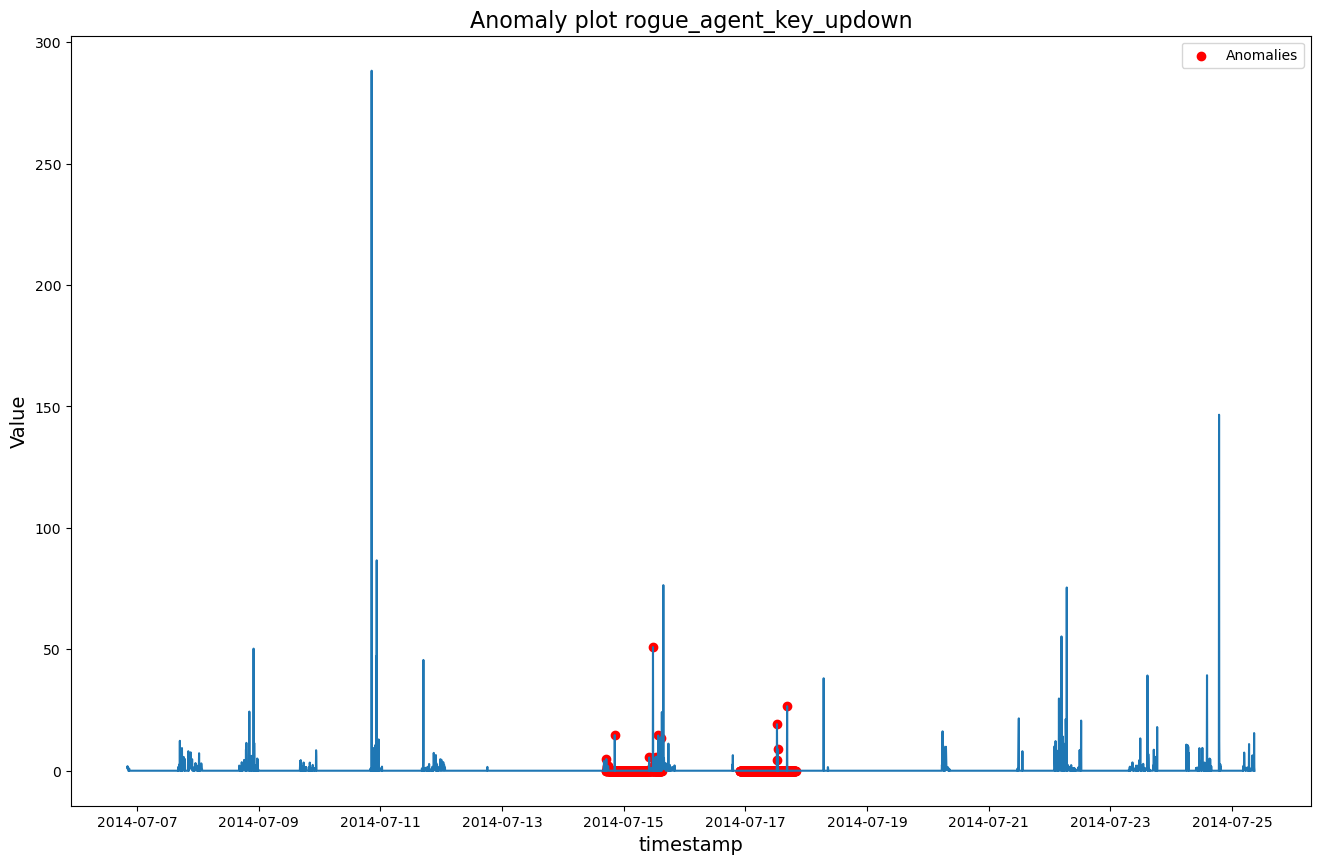

In [68]:
start_date = '2014-07-14 17:00:00'#label anomaly starts  "2014-07-15 04:00:00",
end_date = '2014-07-15 15:00:00' #window was "2014-07-14 17:00:00","2014-07-15 15:00:00"

file_name = 'rogue_agent_key_updown'
df = pd.read_csv(f'NAB/realKnownCause/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2014-07-16 21:50:00'#label anomaly starts  "2014-07-17 08:50:00"
end_date = '2014-07-17 19:50:00' #window was """2014-07-16 21:50:00","2014-07-17 19:50:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

### RealTraffic collection

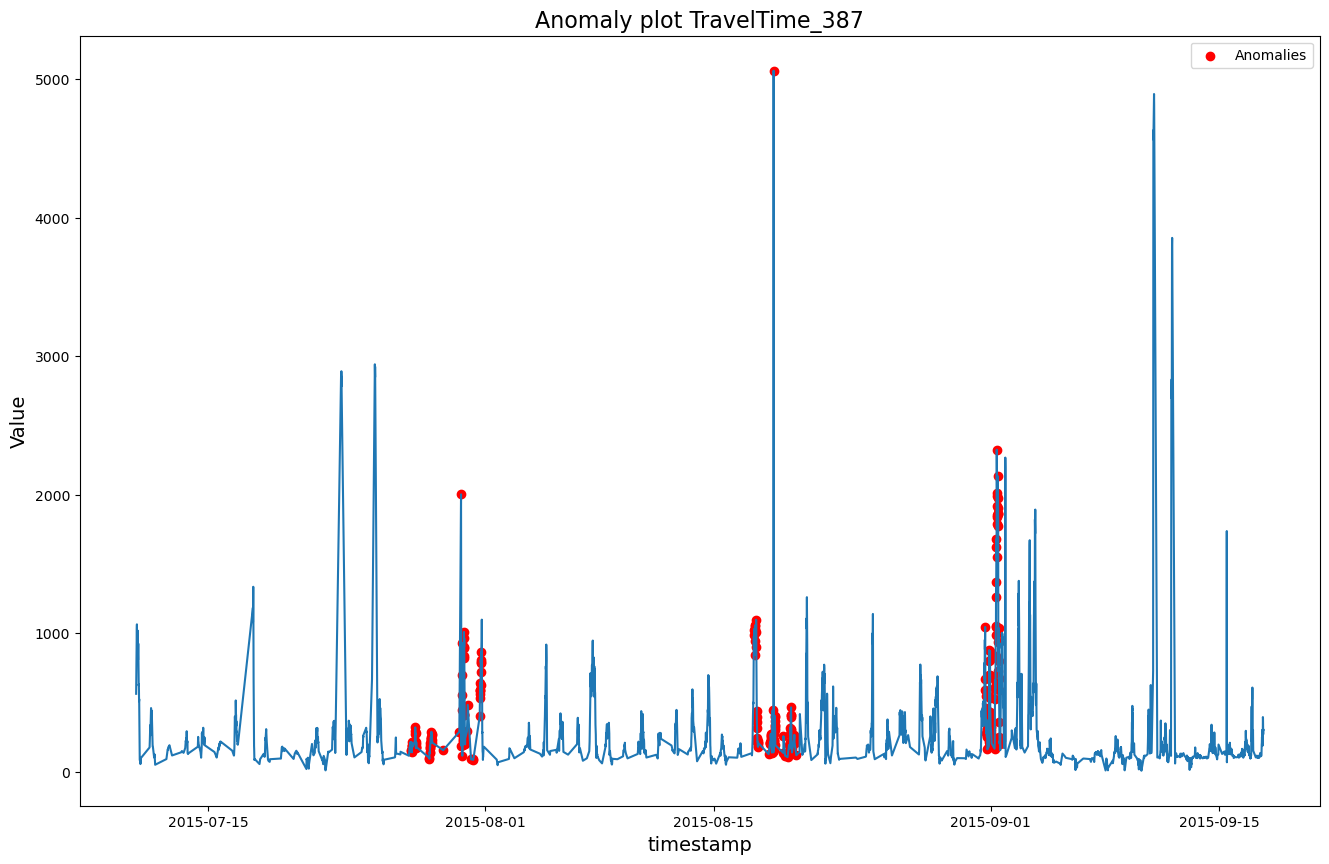

In [69]:
start_date = '2015-07-27 10:56:00'#label anomaly starts  "2015-07-30 12:29:00",
end_date = '2015-07-31 18:01:00' #window was "2015-07-27 10:56:00","2015-07-31 18:01:00"

file_name = 'TravelTime_387'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-08-17 11:51:00'#label anomaly starts  "2015-08-18 16:26:00",
end_date = '2015-08-20 01:54:00' #window was "2015-08-17 11:51:00","2015-08-20 01:54:00"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-08-31 15:44:00'#label anomaly starts  "2015-09-01 05:34:00"
end_date = '2015-09-01 13:06:00' #window was "2015-08-31 15:44:00","2015-09-01 13:06:00"

filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

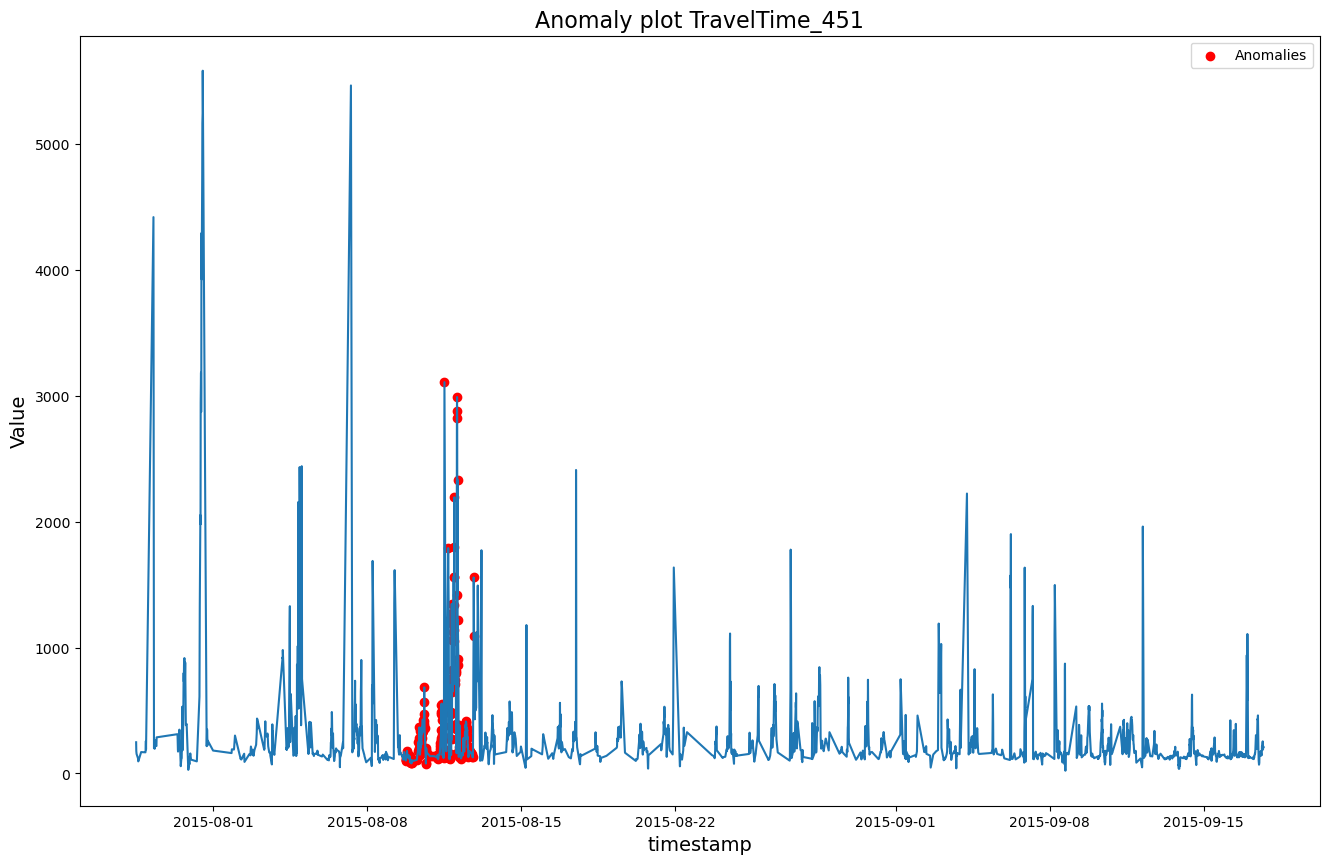

In [70]:
start_date = '2015-08-09 17:57:00'#label anomaly starts  "2015-08-11 12:07:00"
end_date = '2015-08-12 20:01:00' #window was "2015-08-09 17:57:00","2015-08-12 20:01:00"

file_name = 'TravelTime_451'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

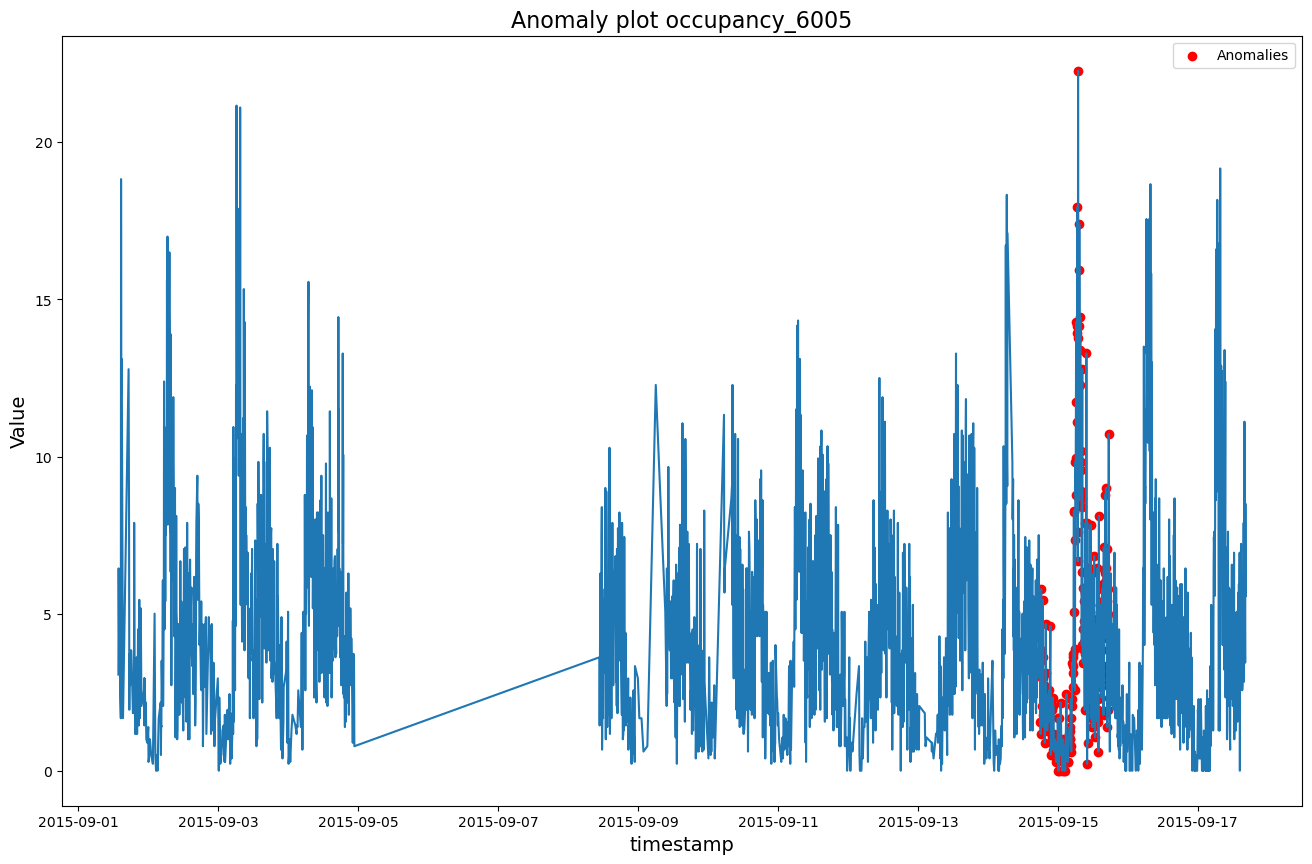

In [71]:
start_date = '2015-09-14 17:45:00'#label anomaly starts  "2015-09-15 06:55:00"
end_date = '2015-09-15 17:24:00' #window was ""2015-09-14 17:45:00","2015-09-15 17:24:00"

file_name = 'occupancy_6005'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

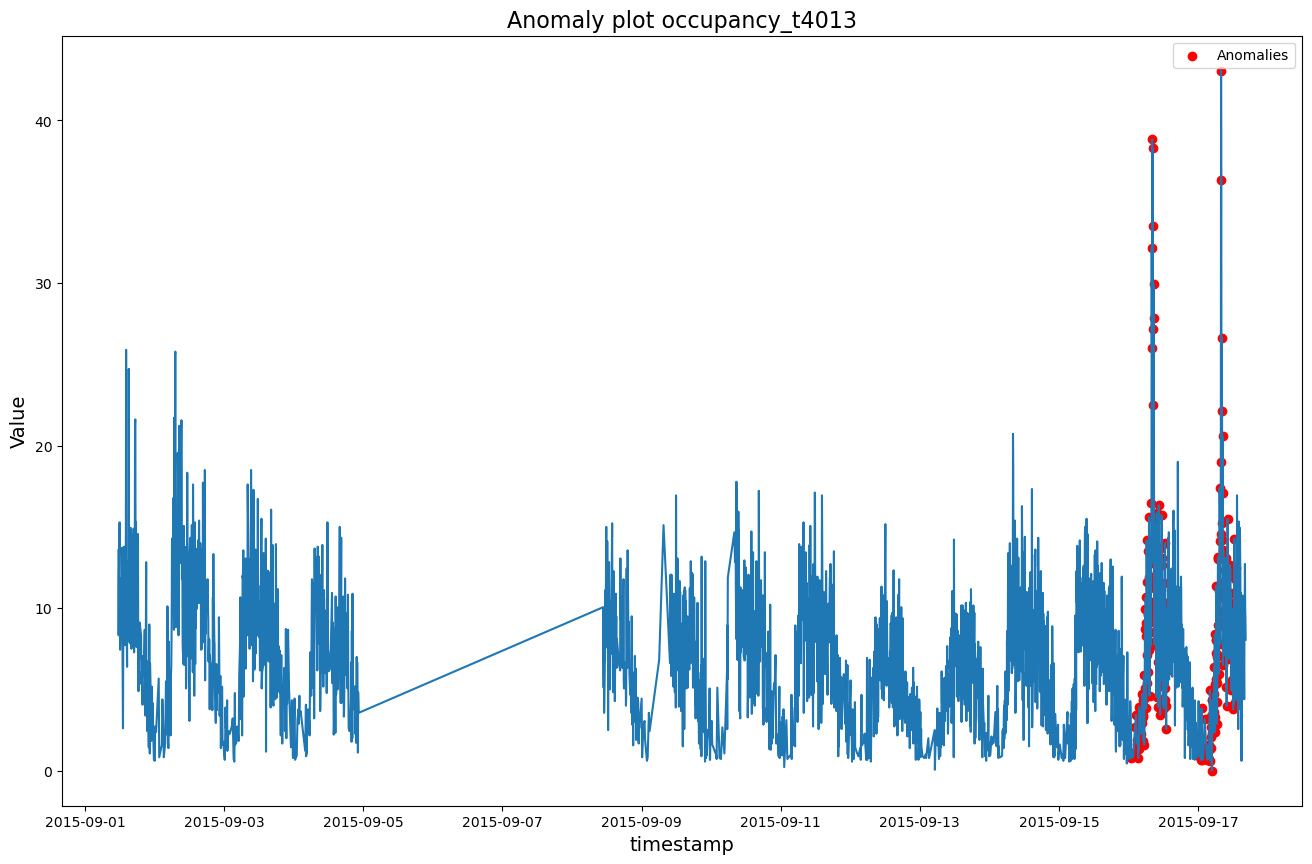

In [72]:
start_date = '2015-09-16 00:59:00'#label anomaly starts  "2015-09-16 08:09:00",
end_date = '2015-09-16 13:19:00' #window was "2015-09-16 00:59:00","2015-09-16 13:19:00"

file_name = 'occupancy_t4013'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-09-17 00:20:00'#label anomaly starts  "2015-09-17 07:55:00"
end_date = '2015-09-17 13:10:00' #window was "2015-09-17 00:20:00","2015-09-17 13:10:00"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

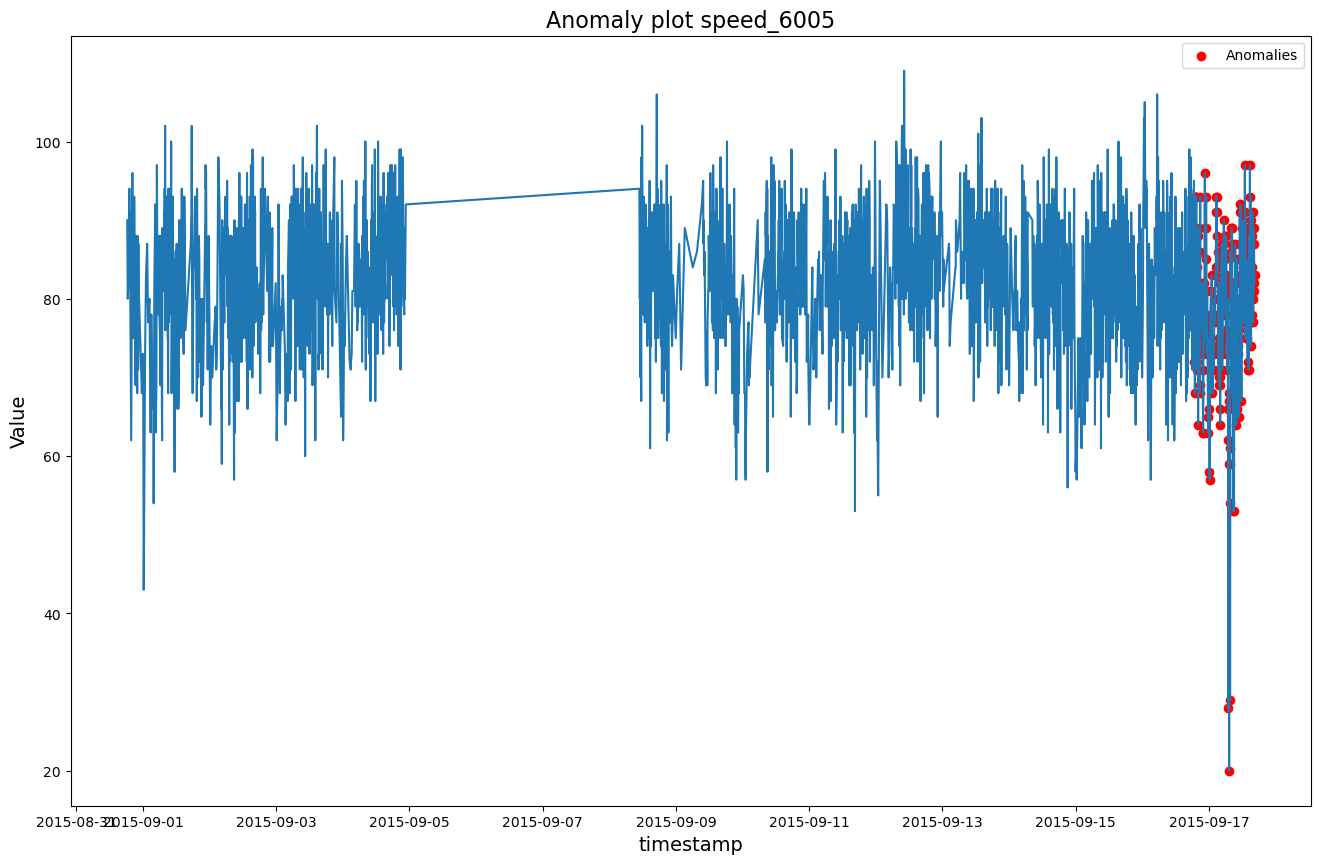

In [73]:
start_date = '2015-09-16 18:40:00'#label anomaly starts  "2015-09-17 07:00:00"
end_date = '2015-09-17 16:24:00' #window was "2015-09-16 18:40:00","2015-09-17 16:24:00"

file_name = 'speed_6005'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

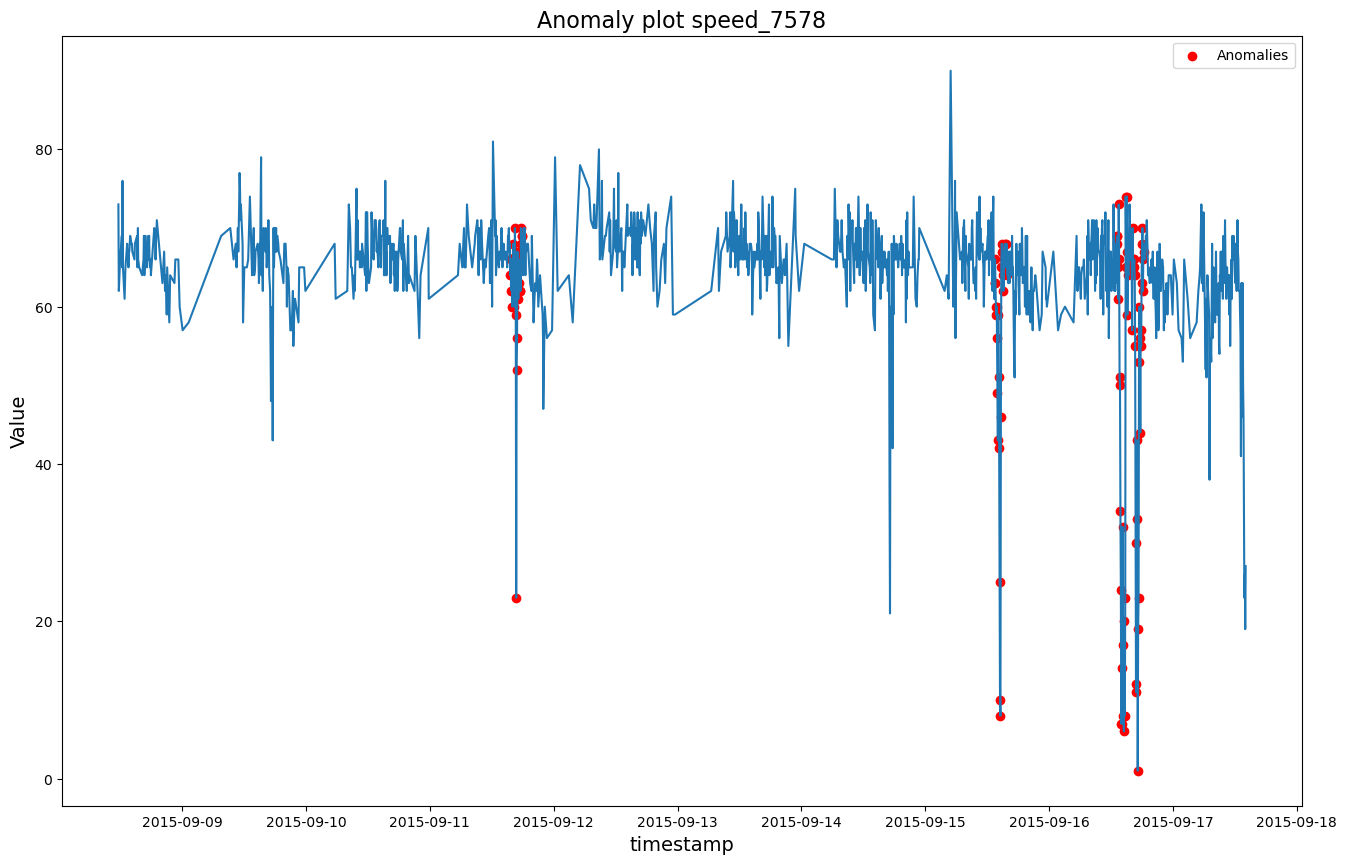

In [74]:
start_date = '2015-09-11 15:34:00'#label anomaly starts  "2015-09-11 16:44:00",
end_date = '2015-09-11 17:54:00' #window was "2015-09-11 15:34:00","2015-09-11 17:54:00"

file_name = 'speed_7578'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-09-15 13:26:00'#label anomaly starts  "2015-09-15 14:34:00",
end_date = '2015-09-15 15:54:00' #window was "2015-09-15 13:26:00","2015-09-15 15:54:00"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-09-16 13:04:00'#label anomaly starts  "2015-09-16 14:14:00",
end_date = '2015-09-16 15:20:00' #window was "2015-09-16 13:04:00","2015-09-16 15:20:00"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-09-16 16:00:00'#label anomaly starts  "2015-09-16 17:10:00"
end_date = '2015-09-16 18:20:00' #window was "2015-09-16 16:00:00","2015-09-16 18:20:00"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

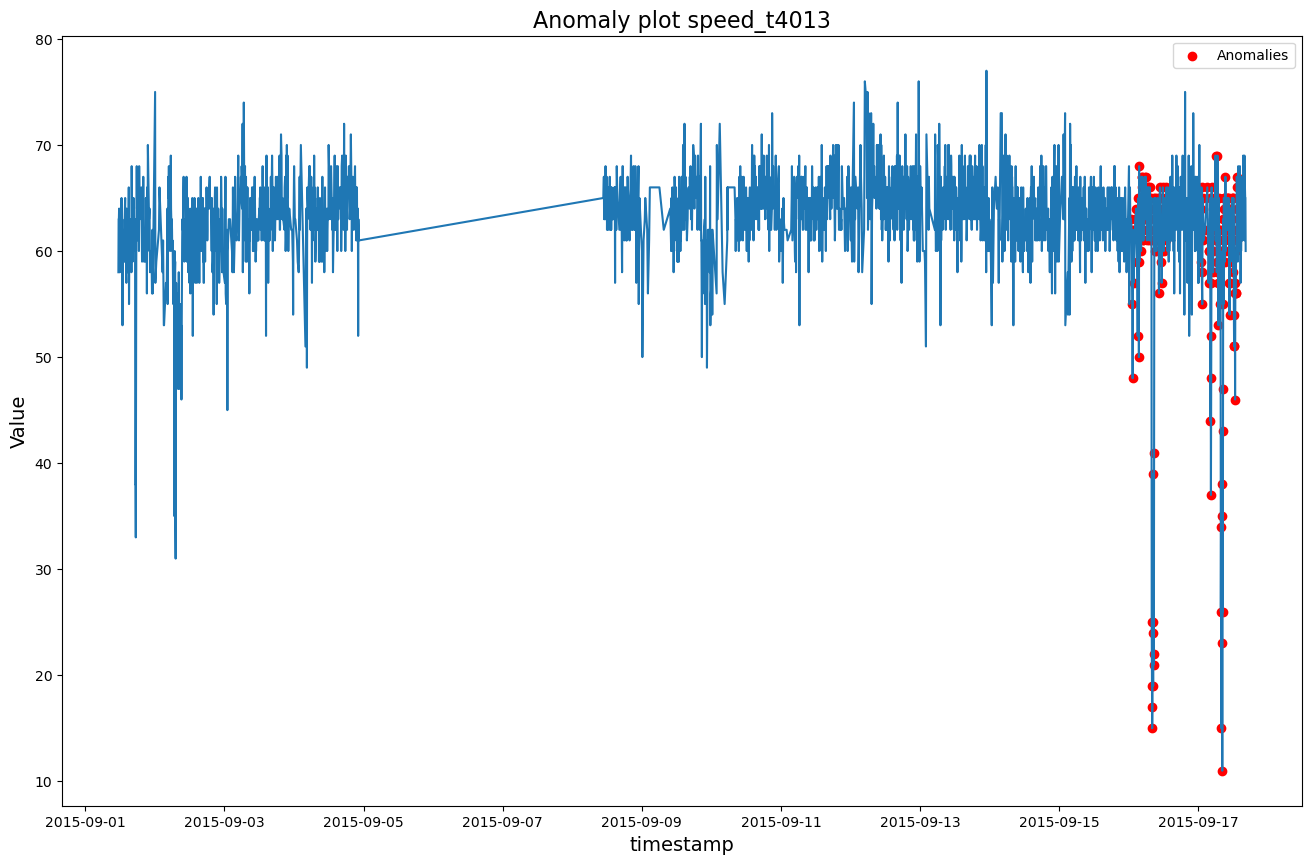

In [75]:
start_date = '2015-09-16 00:44:00'#label anomaly starts  "2015-09-16 08:04:00",
end_date = '2015-09-16 13:14:00' #window was "2015-09-16 00:44:00","2015-09-16 13:14:00"

file_name = 'speed_t4013'
df = pd.read_csv(f'NAB/realTraffic/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-09-17 00:30:00'#label anomaly starts  "2015-09-17 08:15:00"
end_date = '2015-09-17 13:30:00' #window was "2015-09-17 00:30:00","2015-09-17 13:30:00"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

### RealTweets collection

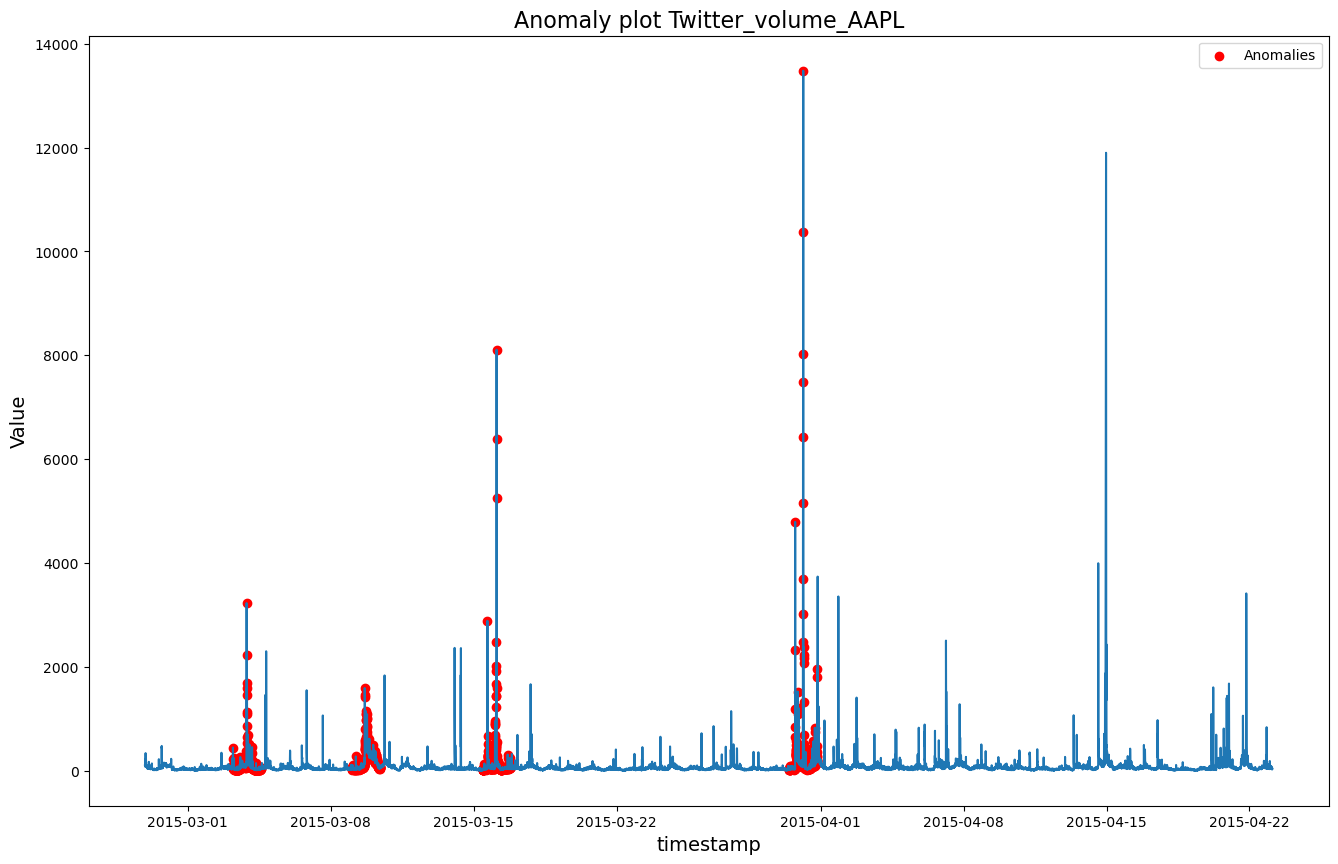

In [76]:
start_date = '2015-03-03 04:37:53'#label anomaly starts  "2015-03-03 21:07:53",
end_date = '2015-03-04 13:37:53' #window was  "2015-03-03 04:37:53.000000","2015-03-04 13:37:53.000000"

file_name = 'Twitter_volume_AAPL'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-09 01:02:53'#label anomaly starts  "2015-03-09 17:32:53",
end_date = '2015-03-10 10:02:53' #window was "2015-03-09 01:02:53.000000","2015-03-10 10:02:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-15 10:27:53'#label anomaly starts  "2015-03-16 02:57:53",
end_date = '2015-03-16 19:27:53' #window was "2015-03-15 10:27:53.000000","2015-03-16 19:27:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-30 10:57:53'#label anomaly starts  ""2015-03-31 03:27:53""
end_date = '2015-03-31 19:57:53' #window was "2015-03-30 10:57:53.000000","2015-03-31 19:57:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

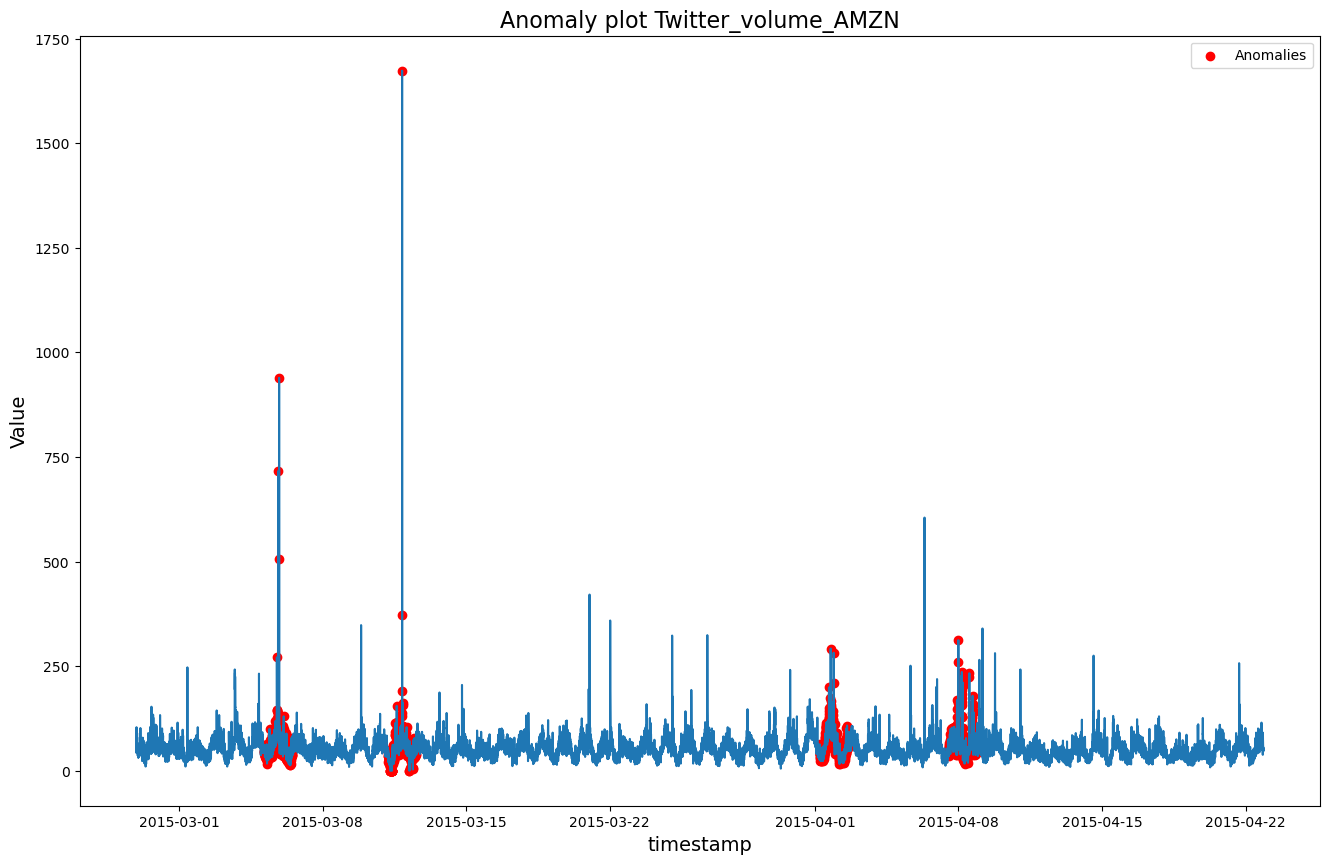

In [77]:
start_date = '2015-03-05 03:22:53'#label anomaly starts  "2015-03-05 19:47:53", 
end_date = '2015-03-06 12:12:53' #window was "2015-03-05 03:22:53.000000","2015-03-06 12:12:53.000000"

file_name = 'Twitter_volume_AMZN'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-11 04:32:53'#label anomaly starts  "2015-03-11 20:57:53",
end_date = '2015-03-12 13:22:53' #window was "2015-03-11 04:32:53.000000","2015-03-12 13:22:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-01 05:32:53'#label anomaly starts   "2015-04-01 21:57:53",
end_date = '2015-04-02 14:22:53' #window was "2015-04-01 05:32:53.000000","2015-04-02 14:22:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-07 12:27:53'#label anomaly starts  "2015-04-08 04:52:53"
end_date = '2015-04-08 21:17:53' #window was "2015-04-07 12:27:53.000000","2015-04-08 21:17:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

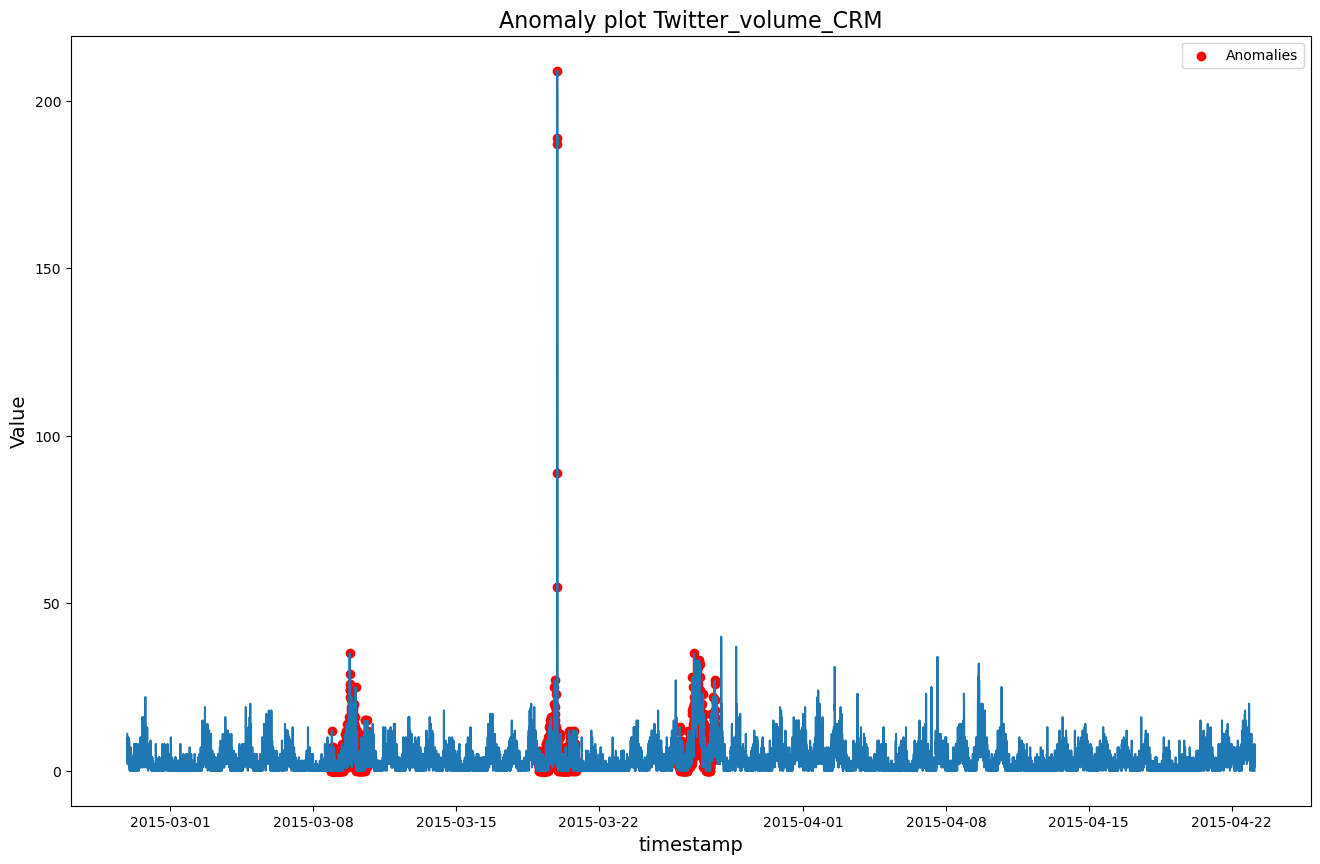

In [78]:
start_date = '2015-03-08 21:02:53'#label anomaly starts  "2015-03-09 19:07:53",
end_date = '2015-03-10 17:12:53' #window was "2015-03-08 21:02:53.000000","2015-03-10 17:12:53.000000"

file_name = 'Twitter_volume_CRM'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-19 01:02:53'#label anomaly starts  "2015-03-19 23:07:53",
end_date = '2015-03-20 21:12:53' #window was "2015-03-19 01:02:53.000000","2015-03-20 21:12:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-25 21:02:53'#label anomaly starts  "2015-03-26 19:07:53"
end_date = '2015-03-27 17:12:53' #window was "2015-03-25 21:02:53.000000","2015-03-27 17:12:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

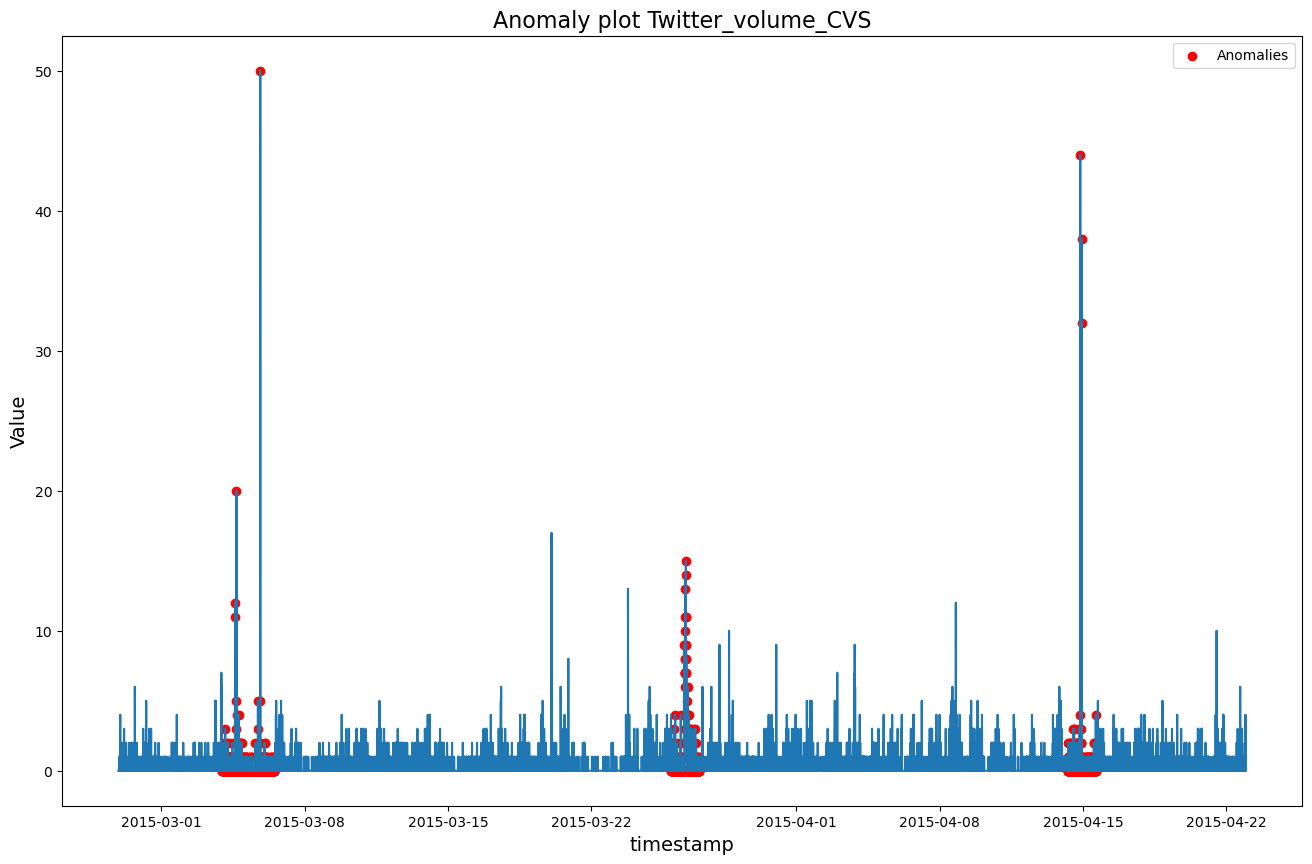

In [79]:
start_date = '2015-03-03 23:32:53'#label anomaly starts  "2015-03-04 16:02:53",
end_date = '2015-03-06 12:27:53' #window was "2015-03-03 23:32:53.000000" -"2015-03-06 12:27:53.000000"

file_name = 'Twitter_volume_CVS'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-14 06:07:53'#label anomaly starts  "2015-04-14 22:37:53"
end_date = '2015-04-15 15:07:53' #window was """"2015-04-14 06:07:53.000000","2015-04-15 15:07:53.000000" 
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-25 21:37:53'#label anomaly starts  "2015-03-26 14:07:53",
end_date = '2015-03-27 06:37:53' #window was """"2015-03-25 21:37:53.000000","2015-03-27 06:37:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

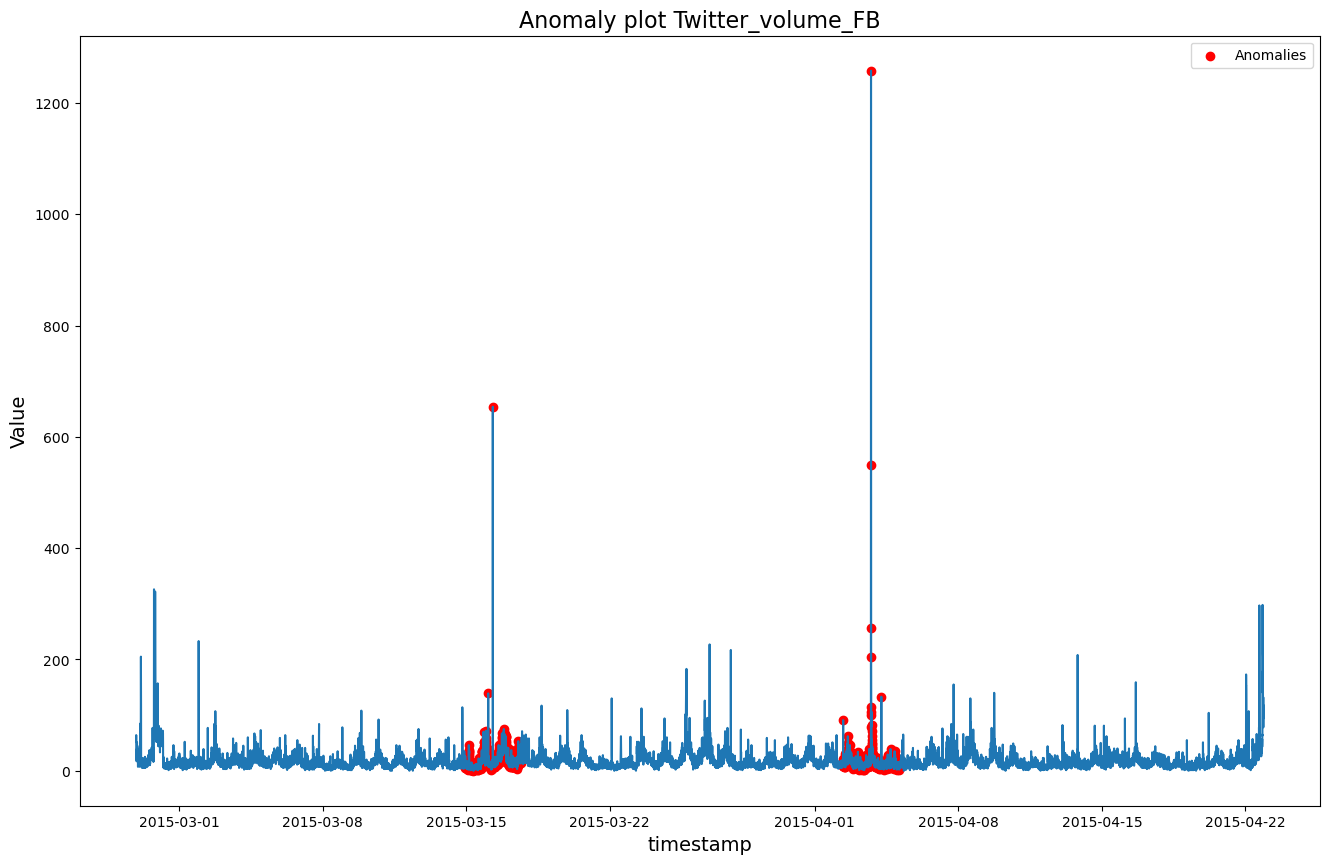

In [80]:
start_date = '2015-03-14 22:12:53'#label anomaly starts  "2015-03-16 07:07:53",
end_date = '2015-03-17 16:02:53' #window was "2015-03-14 22:12:53.000000","2015-03-17 16:02:53.000000"

file_name = 'Twitter_volume_FB'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-02 08:52:53'#label anomaly starts  "2015-04-03 17:47:53"
end_date = '2015-04-05 02:42:53' #window was "2015-04-02 08:52:53.000000","2015-04-05 02:42:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

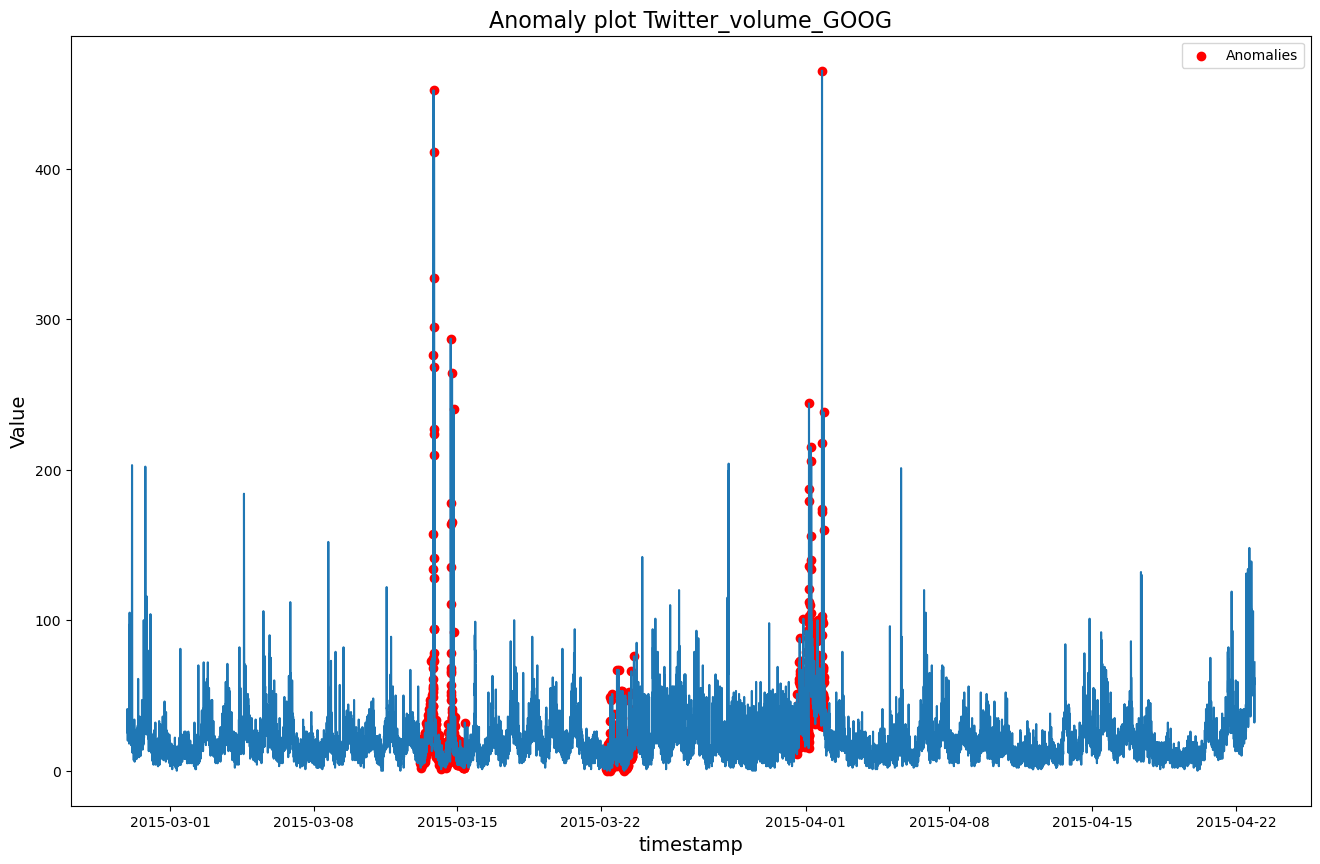

In [81]:
start_date = '2015-03-13 03:52:53'#label anomaly starts  "2015-03-13 20:22:53",
end_date = '2015-03-15 08:57:53' #window was "2015-03-13 03:52:53.000000","2015-03-15 08:57:53.000000"

file_name = 'Twitter_volume_GOOG'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-22 06:22:53'#label anomaly starts  "2015-03-14 16:27:53",
end_date = '2015-03-23 15:22:53' #window was "2015-03-22 06:22:53.000000","2015-03-23 15:22:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-31 12:57:53'#label anomaly starts  "2015-03-22 22:52:53",
end_date = '2015-04-01 21:57:53' #window was "2015-03-31 12:57:53.000000","2015-04-01 21:57:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

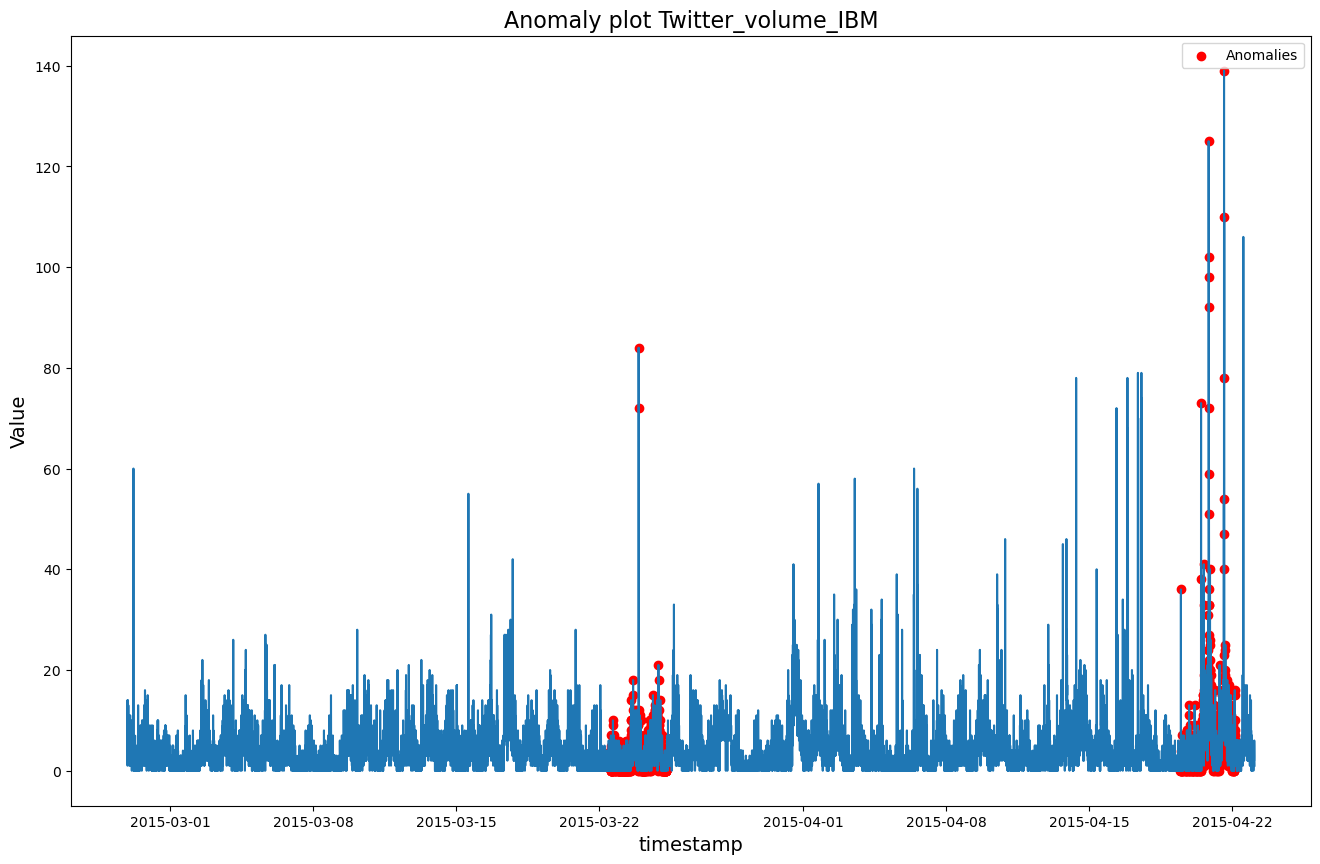

In [82]:
start_date = '2015-03-22 13:22:53'#label anomaly starts  "2015-03-23 22:27:53",
end_date = '2015-03-25 07:32:53' #window was "2015-03-22 13:22:53.000000","2015-03-25 07:32:53.000000"

file_name = 'Twitter_volume_IBM'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-19 11:02:53'#label anomaly starts  "2015-04-20 20:07:53"
end_date = '2015-04-22 05:12:53' #window was "2015-04-19 11:02:53.000000","2015-04-22 05:12:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

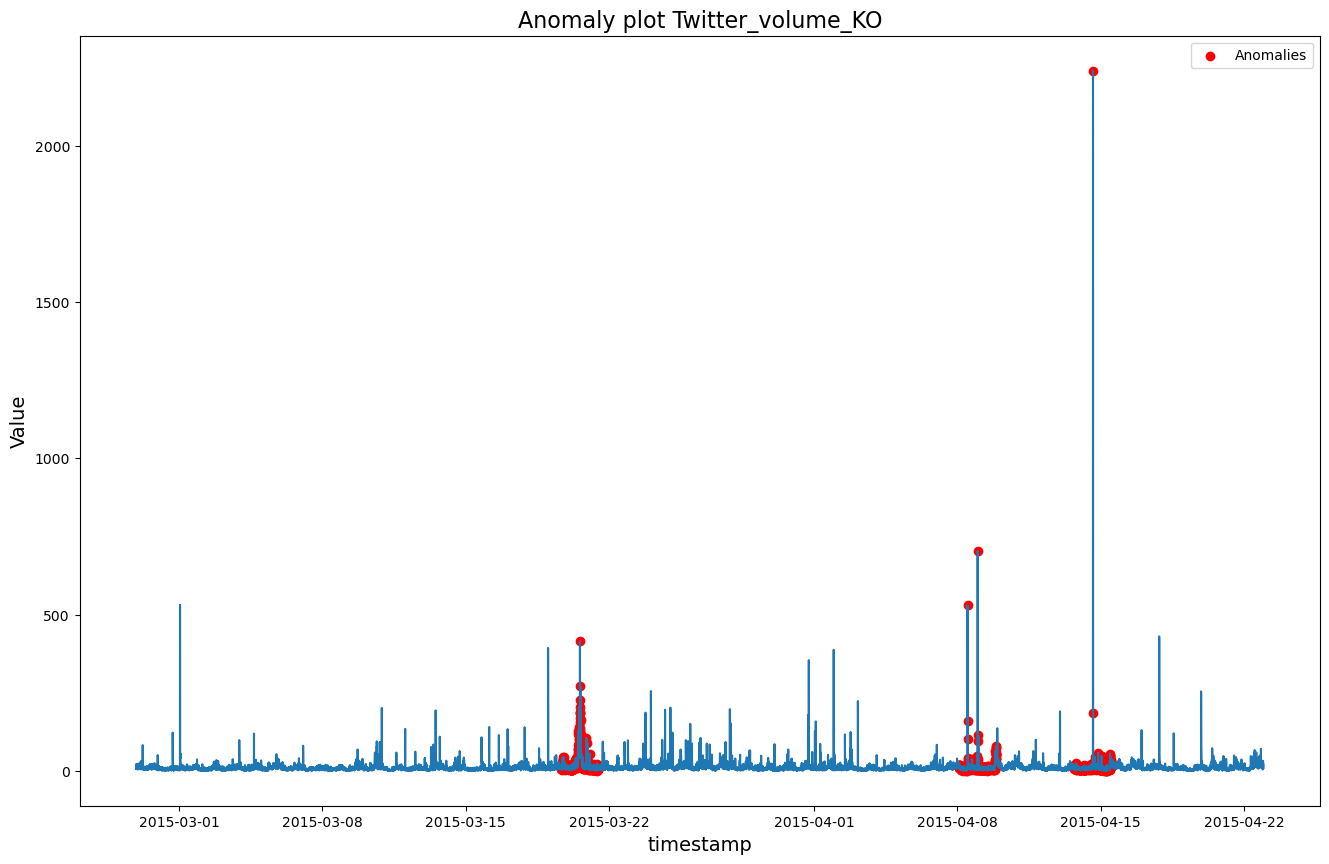

In [83]:
start_date = '2015-03-19 15:12:53'#label anomaly starts  "2015-03-20 13:12:53",
end_date = '2015-03-21 11:12:53' #window was "2015-03-19 15:12:53.000000","2015-03-21 11:12:53.000000"

file_name = 'Twitter_volume_KO'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-08 01:42:53'#label anomaly starts  "2015-04-08 23:42:53"
end_date = '2015-04-09 21:42:53' #window was "2015-04-08 01:42:53.000000","2015-04-09 21:42:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-13 16:52:53'#label anomaly starts  "2015-04-14 14:52:53"
end_date = '2015-04-15 12:52:53' #window was "2015-04-13 16:52:53.000000","2015-04-15 12:52:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

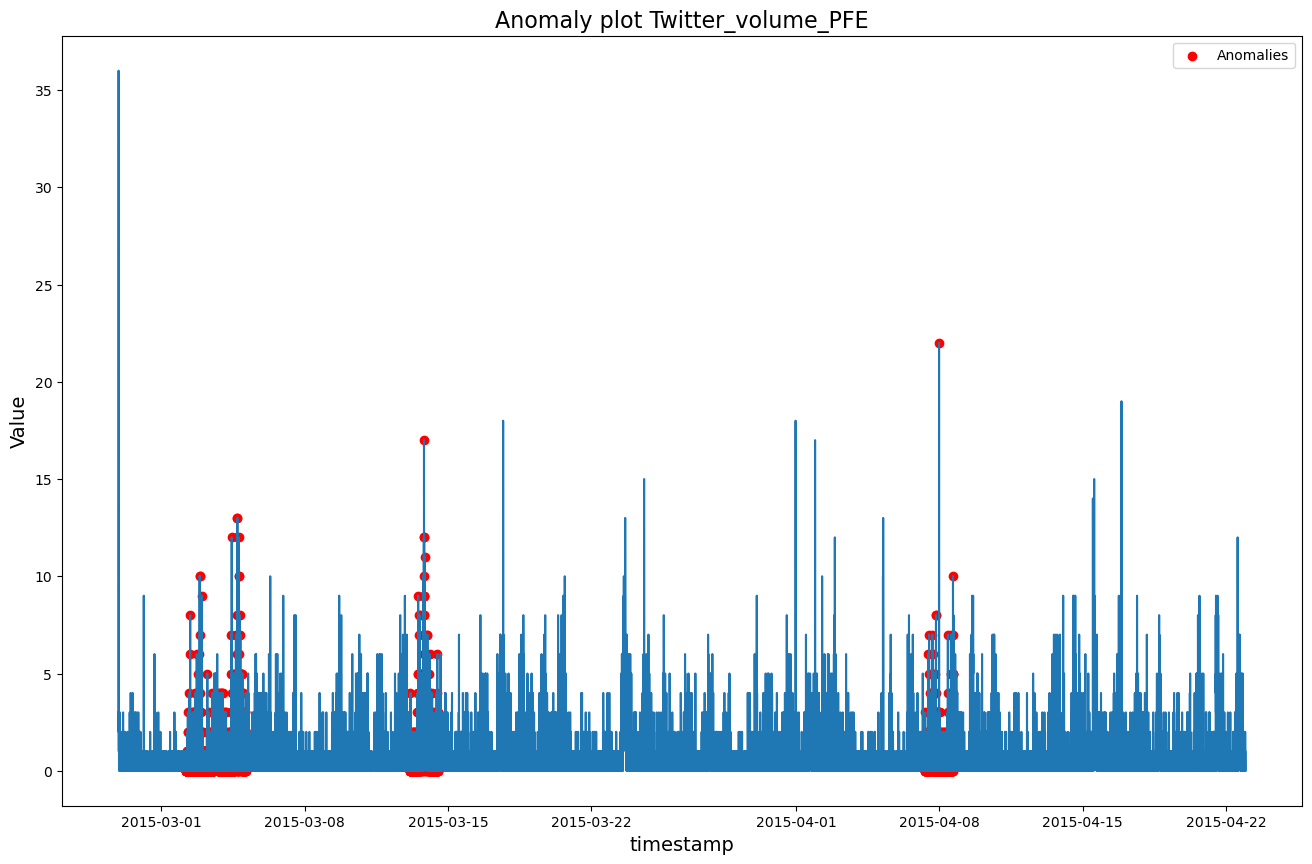

In [84]:
start_date = '2015-03-02 04:52:53'#label anomaly starts  ""2015-03-02 21:22:53"
end_date = '2015-03-03 13:52:53' #window was "2015-03-02 04:52:53.000000","2015-03-03 13:52:53.000000"

file_name = 'Twitter_volume_PFE'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-03 18:02:53'#label anomaly starts  "2015-03-04 10:32:53",
end_date = '2015-03-05 03:02:53' #window was "2015-03-03 18:02:53.000000","2015-03-05 03:02:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-13 03:27:53'#label anomaly starts  "2015-03-13 19:57:53",
end_date = '2015-03-14 12:27:53' #window was "2015-03-13 03:27:53.000000","2015-03-14 12:27:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-04-07 07:12:53'#label anomaly starts  "2015-04-07 23:42:53""
end_date = '2015-04-08 16:12:53' #window was """"2015-04-07 07:12:53.000000","2015-04-08 16:12:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)

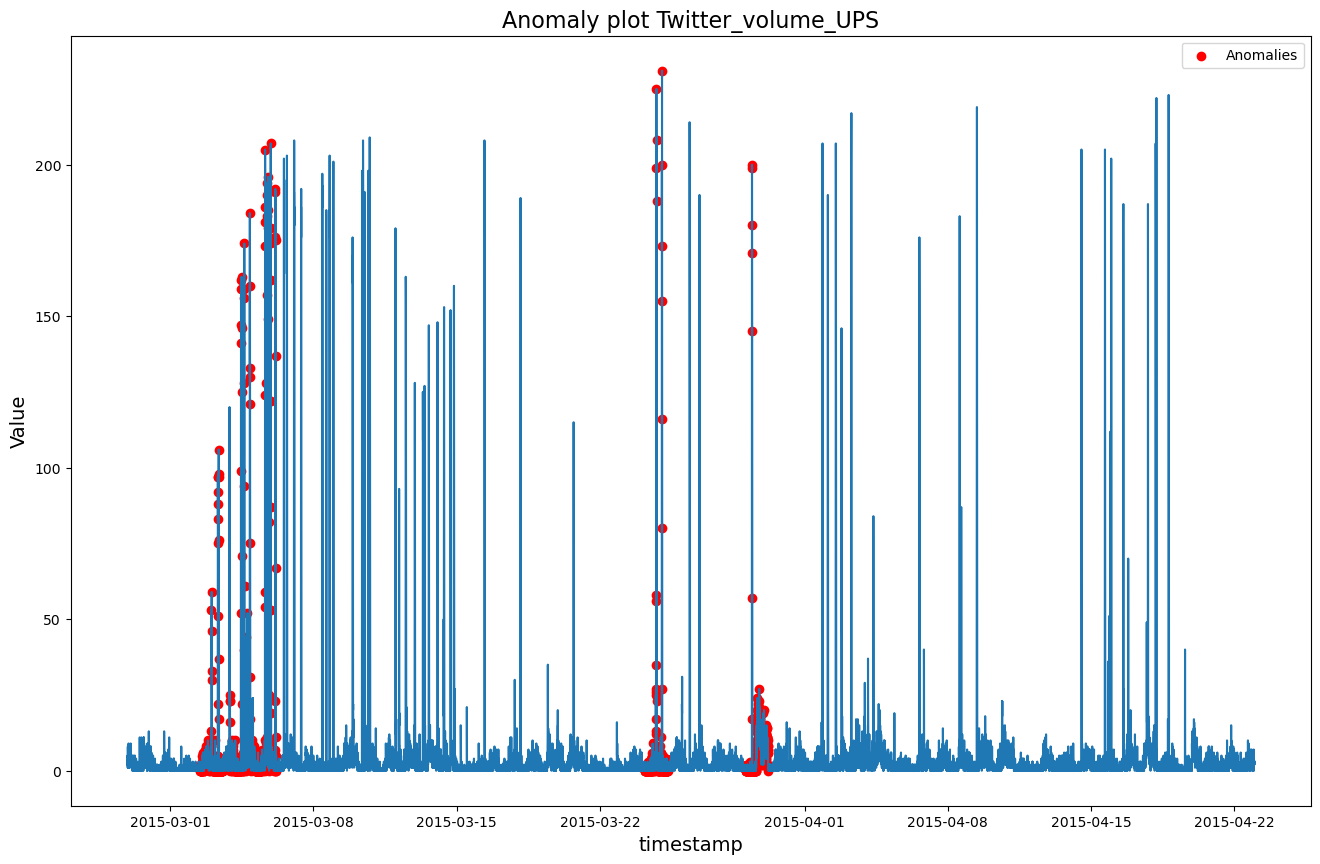

In [85]:
start_date = '2015-03-02 11:17:53'#label anomaly starts  "2015-03-03 00:27:53",   
end_date = '2015-03-03 13:37:53' #window was "2015-03-02 11:17:53.000000","2015-03-03 13:37:53.000000"

file_name = 'Twitter_volume_UPS'
df = pd.read_csv(f'NAB/realTweets/{file_name}.csv')

df['is_anomaly'] = 0
filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-03 21:57:53'#label anomaly starts  "2015-03-04 11:07:53",
end_date = '2015-03-05 00:17:53' #window was "2015-03-03 21:57:53.000000","2015-03-05 00:17:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-05 02:12:53'#label anomaly starts  "2015-03-05 15:22:53",
end_date = '2015-03-06 04:32:53' #window was "2015-03-05 02:12:53.000000","2015-03-06 04:32:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-24 05:07:53'#label anomaly starts  "2015-03-24 18:17:53",
end_date = '2015-03-25 07:27:53' #window was """"2015-03-24 05:07:53.000000","2015-03-25 07:27:53.000000"

filtered_df = filter_anomalies(df, start_date, end_date)
#plot_anomalies(filtered_df, file_name)
#save_to_csv(filtered_df, file_name)

start_date = '2015-03-29 03:17:53'#label anomaly starts  "2015-03-29 16:27:53"
end_date = '2015-03-30 05:37:53' #window was "2015-03-29 03:17:53.000000","2015-03-30 05:37:53.000000"
filtered_df = filter_anomalies(df, start_date, end_date)
plot_anomalies(filtered_df, file_name)
save_to_csv(filtered_df, file_name)